# MEDICAL SPECIALTY CLASSIFICATION

## Problem Statement
We need to build a model that is able to classify medical transcriptions by subspecialty of medicine. By doing so, we can segregate these medical transcription notes into their relevant sub-speciality categories


## Pipelines that needs to be performed:

We need to perform the following major tasks to complete the assignment:

Data loading

Data Cleaning

Exploratory data analysis (EDA)

Data preprocessing

Model building 

Model training and evaluation

Model inference

IMPORT LIBRARIES

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns #plot graphs,charts
import matplotlib.pyplot as plt#plot graphs,charts

import string
import re

import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
import os

from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score

import nltk
nltk.download('stopwords')
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from pprint import pprint
from sklearn import naive_bayes # .MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from os.path import join
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer




np.seterr(divide='ignore', invalid='ignore')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heebasarmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.decomposition import PCA


warnings.filterwarnings('ignore')


In [3]:
os.getcwd()

'C:\\Users\\heebasarmad\\Downloads'

## Loading data


In [4]:
 # path for the dataset
file= "mtsamples.csv"

In [5]:
df=pd.read_csv(file)# read the csv file into the pandas dataframe
df.head() # check first 5 rows of the dataset

Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                            keywords  
0  allergy / immunology, allergic rhinitis, aller...  
1  bariatrics, laparoscopic gastric bypass, weigh...  
2  bariatrics, laparoscopic gastric bypass, heart...  
3  cardiovascular / pulmonary, 2-d m-mode, dopple...  
4  cardiovascular / pulmonary, 2-d, doppler, echo...

In [6]:
#check the shape of the dataset
df.shape

(4999, 6)

In [7]:
# check the null values in each column
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

# DATA CLEANING

In [8]:
# for our classification tasks only two columns are required ,transcription and medical speciality, dropping all other columns 
df.drop(['Unnamed: 0','description','sample_name','keywords'], axis=1, inplace=True)
df.head()

medical_specialty  \
0         Allergy / Immunology   
1                   Bariatrics   
2                   Bariatrics   
3   Cardiovascular / Pulmonary   
4   Cardiovascular / Pulmonary   

                                       transcription  
0  SUBJECTIVE:,  This 23-year-old white female pr...  
1  PAST MEDICAL HISTORY:, He has difficulty climb...  
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...  
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...  
4  1.  The left ventricular cavity size and wall ...

In [9]:
# check the null values in each column
df.isnull().sum()

medical_specialty     0
transcription        33
dtype: int64

In [10]:
# remove the rows with null values in transcription column
df.dropna(axis=0,inplace=True)

In [11]:
# check the shape of the dataset
df.shape

(4966, 2)

In [12]:
# check the number of unique values in medical speciality
df["medical_specialty"].nunique()

40

In [13]:
# check the unique values in medical speciality
df["medical_specialty"].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [14]:
#check the value counts of each category in medical speciality

df["medical_specialty"].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

## REMOVING WRONGLY MARKED SUB-PECIALITIES

In [15]:
# After analysing the categories based on the domain knowledge,it is noticed that some of the categories do not represent the actual sub speciality
Non_sub_speciality=[" Consult - History and Phy."," Consult - History and Phy.", " SOAP / Chart / Progress Notes"," Discharge Summary"," Emergency Room Reports"," Office Notes"," Letters"," IME-QME-Work Comp etc."]

In [16]:
# remove the rows with Medical speciality not representing the actual sub speciality
for i in Non_sub_speciality:
    df=df[df['medical_specialty'] != i]


In [17]:
#check the shape again
df.shape

(4012, 2)

In [18]:
#check the unique number of medical speciality categories again
df['medical_specialty'].nunique()

33

In [19]:
#Check the null values again
df.isnull().sum()

medical_specialty    0
transcription        0
dtype: int64

# EDA

In [20]:
# check the value counts for each category
df["medical_specialty"].value_counts().to_frame()

medical_specialty
 Surgery                                  1088
 Cardiovascular / Pulmonary                371
 Orthopedic                                355
 Radiology                                 273
 General Medicine                          259
 Gastroenterology                          224
 Neurology                                 223
 Urology                                   156
 Obstetrics / Gynecology                   155
 ENT - Otolaryngology                       96
 Neurosurgery                               94
 Hematology - Oncology                      90
 Ophthalmology                              83
 Nephrology                                 81
 Pediatrics - Neonatal                      70
 Pain Management                            61
 Psychiatry / Psychology                    53
 Podiatry                                   47
 Dermatology                                29
 Cosmetic / Plastic Surgery                 27
 Dentistry                                  27
 Physical Medicine - Rehab                  21
 Sleep Medicine                             20
 Endocrinology                              19
 Bariatrics                                 18
 Chiropractic                               14
 Rheumatology                               10
 Diets and Nutritions                       10
 Speech - Language                           9
 Autopsy                                     8
 Lab Medicine - Pathology                    8
 Allergy / Immunology                        7
 Hospice - Palliative Care                   6

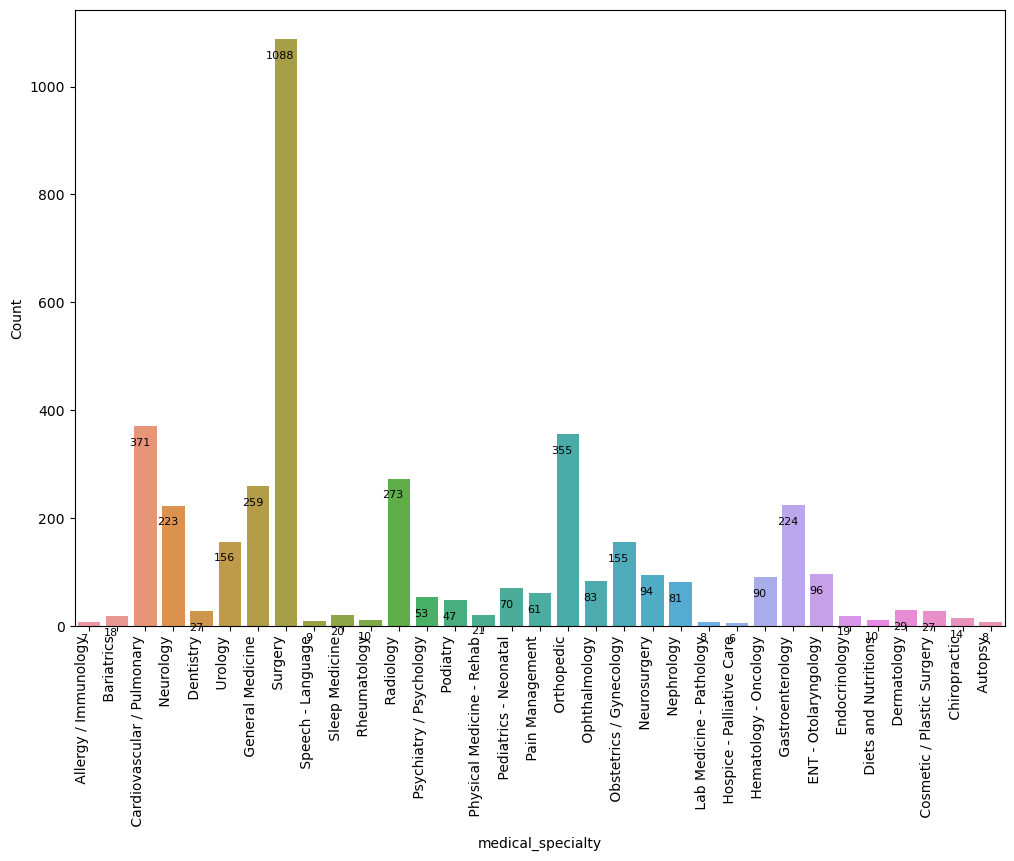

In [21]:
# plot the countplot for medical specialty categories
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="medical_specialty" , data=df)
ax.set(xlabel="medical_specialty", ylabel='Count')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
#without_hue(ax3,g["YEAR"])
plt.show()

(-1.1027000204112034,
 1.1001285724005334,
 -1.1007966457653005,
 1.1094798082357487)

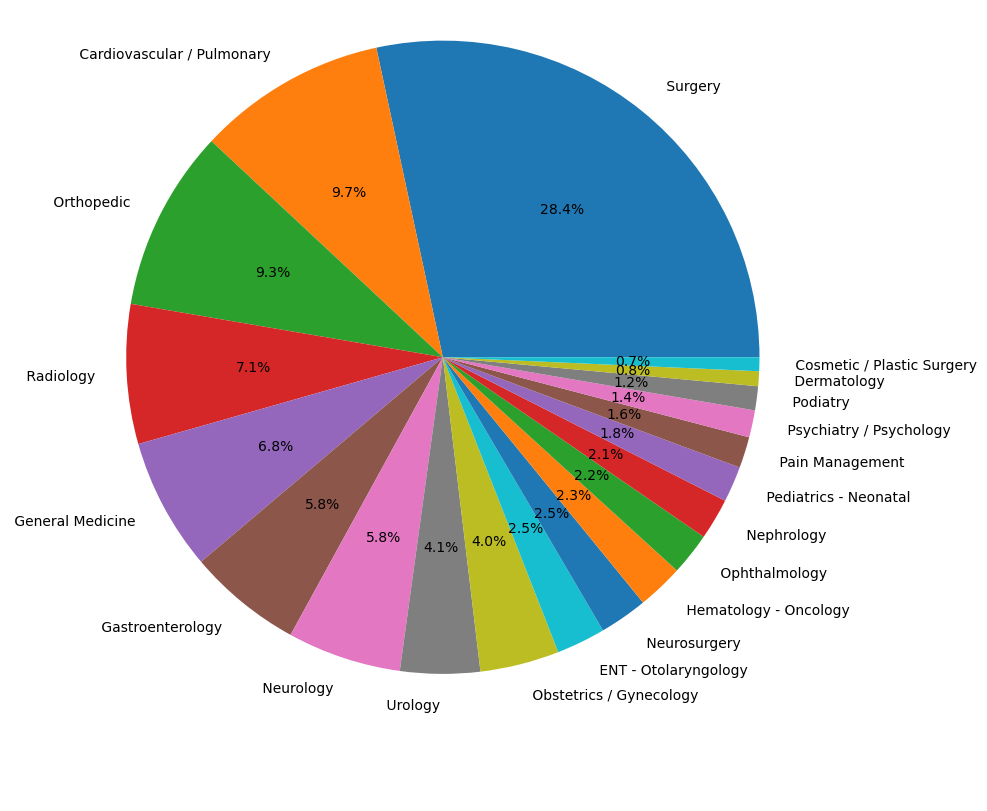

In [22]:
#check the percentage distribution of top 20 sub specialities
value_c=df["medical_specialty"].value_counts()[:20]
plt.figure(figsize=(9,9))
plt.title(' ', y=-0.15)
plt.pie(value_c, labels=list(value_c.index), autopct="%.1f%%")
plt.axis('equal')

We can see the surgery alone accounts for 28% while 7 out of top 20 accounts for <20%. So we can see see that the dataset is imbalanced.

## PRE PROCESSING TEXT(TRANSCRIPTION TEXT)

In [23]:
# check the sample transcription
df["transcription"][0]


'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

We can see there is a mixture of capital and small letters, punctuations, symbols and special letters and numbers. There also are stopwords which can be removed without any effect on the whole topic of the text.

In [24]:
#create a dataset with
#training_data = df[["transcription","medical_specialty"]]
#training_data

##  Prepare the text.


Make the text lowercase

Remove text in square brackets

Remove punctuation

Remove words containing numbers

Remove the stop words.

Once we have done these cleaning operations we need to perform the following:

Preprocess using sciSpacy to extract the biomedical entities

Lemmatize the texts


### Clean the text

In [25]:
#get the stop words
STOPWORDS = set(stopwords.words('english'))


In [120]:
def clean_text(x):
    x=x.lower()
    x=re.sub(r'[/(){}\[\]\|@,;]',"",x)
    x="".join([char if char not in string.punctuation else " " for char in x])
    x=re.sub(r'\w*\d\w*',"",x) 
    x=' '.join(word for word in x.split()if word not in STOPWORDS)
    return x

In [26]:
#df['clean_transcription'] =[clean_text(x) for x in df['transcription']]    

In [27]:
# Write your function here to clean the text and remove all the unnecessary elements.
# Make the text lowercase
df['clean_transcription']=[x.lower() for x in df["transcription"]]

#Remove text in square brackets
df["clean_transcription"]=[re.sub(r'[/(){}\[\]\|@,;]',"",x) for x in df["clean_transcription"]]

#Remove punctuation
df["clean_transcription"]=["".join([char if char not in string.punctuation else " " for char in x]) for x in df["clean_transcription"]]

#Remove words containing numbers
df["clean_transcription"]=[re.sub(r'\w*\d\w*',"",x) for x in df["clean_transcription"]]

#Remove stop words
#df["transcription"]=[' '.join(word for word in text.split() if word not in STOPWORDS)]
df["clean_transcription"]=[' '.join(word for word in text.split() if word not in STOPWORDS) for text in df["clean_transcription"]]
#check after cleaning first complaint
df["clean_transcription"].iloc[0]

'subjective year old white female presents complaint allergies used allergies lived seattle thinks worse past tried claritin zyrtec worked short time seemed lose effectiveness used allegra also used last summer began using two weeks ago appear working well used counter sprays prescription nasal sprays asthma doest require daily medication think flaring medications medication currently ortho tri cyclen allegra allergies known medicine allergies objective vitals weight pounds blood pressure heent throat mildly erythematous without exudate nasal mucosa erythematous swollen clear drainage seen tms clear neck supple without adenopathy lungs clear assessment allergic rhinitis plan try zyrtec instead allegra another option use loratadine think prescription coverage might cheaper samples nasonex two sprays nostril given three weeks prescription written well'

In [28]:
#check the top 5 rows
df.head()

medical_specialty  \
0         Allergy / Immunology   
1                   Bariatrics   
2                   Bariatrics   
3   Cardiovascular / Pulmonary   
4   Cardiovascular / Pulmonary   

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                 clean_transcription  
0  subjective year old white female presents comp...  
1  past medical history difficulty climbing stair...  
2  history present illness seen abc today pleasan...  
3  mode left atrial enlargement left atrial diame...  
4  left ventricular cavity size wall thickness ap...

### Preprocess with spacy

In [29]:
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz

In [30]:

#! pip install en_ner_bionlp13cg_md

In [31]:
#load the installed spacy
nlp = spacy.load("en_ner_bionlp13cg_md")


In [32]:
#Write a function to extract entities using scispcy
def process_Text(text):
    wordlist=[]
    doc = nlp(text)
    for ent in doc.ents:
        wordlist.append(ent.text)
    return ' '.join(wordlist)  

In [33]:
#check the top 5 rows again
df.head()

medical_specialty  \
0         Allergy / Immunology   
1                   Bariatrics   
2                   Bariatrics   
3   Cardiovascular / Pulmonary   
4   Cardiovascular / Pulmonary   

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                 clean_transcription  
0  subjective year old white female presents comp...  
1  past medical history difficulty climbing stair...  
2  history present illness seen abc today pleasan...  
3  mode left atrial enlargement left atrial diame...  
4  left ventricular cavity size wall thickness ap...

In [34]:
#Apply processing text to the clean_transcription column and save in the new column "spacy_transcription"
df['spacy_transcription'] =[process_Text(x) for x in df['clean_transcription']]

In [35]:
df.head()

medical_specialty  \
0         Allergy / Immunology   
1                   Bariatrics   
2                   Bariatrics   
3   Cardiovascular / Pulmonary   
4   Cardiovascular / Pulmonary   

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                 clean_transcription  \
0  subjective year old white female presents comp...   
1  past medical history difficulty climbing stair...   
2  history present illness seen abc today pleasan...   
3  mode left atrial enlargement left atrial diame...   
4  left ventricular cavity size wall thickness ap...   

                                 spacy_transcription  
0  female claritin zyrtec nasal sprays ortho tri ...  
1  muscle joint knee gastroesophageal heart penic...  
2  abc gentleman alcohol calories atkin cholester...  
3  ventricle left ventricular pericardial aortic ...  
4  left ventricular wall left ventricular outflow...

### Lemmatize the text

In [36]:
# import the nltk libraries
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\heebasarmad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heebasarmad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\heebasarmad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
# write function for lemmatize the text

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))    
    return ' '.join(wordlist) 

In [38]:
#create a lemmatized column in datafram
df['lemmatized_transcription'] =[lemmatize_text(x) for x in df['spacy_transcription']]

In [39]:
df.head()

medical_specialty  \
0         Allergy / Immunology   
1                   Bariatrics   
2                   Bariatrics   
3   Cardiovascular / Pulmonary   
4   Cardiovascular / Pulmonary   

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                 clean_transcription  \
0  subjective year old white female presents comp...   
1  past medical history difficulty climbing stair...   
2  history present illness seen abc today pleasan...   
3  mode left atrial enlargement left atrial diame...   
4  left ventricular cavity size wall thickness ap...   

                                 spacy_transcription  \
0  female claritin zyrtec nasal sprays ortho tri ...   
1  muscle joint knee gastroesophageal heart penic...   
2  abc gentleman alcohol calories atkin cholester...   
3  ventricle left ventricular pericardial aortic ...   
4  left ventricular wall left ventricular outflow...   

                            lemmatized_transcription  
0  female claritin zyrtec nasal spray ortho tri c...  
1  muscle joint knee gastroesophageal heart penic...  
2  abc gentleman alcohol calorie atkin cholestero...  
3  ventricle left ventricular pericardial aortic ...  
4  left ventricular wall left ventricular outflow...

In [40]:
# Create a copy of the dataframe
df_1=df

### Dataset with all Medical Specialty categories

In [41]:
#check the top 5 rows with lemmatized_transcription column
df_1.head()

medical_specialty  \
0         Allergy / Immunology   
1                   Bariatrics   
2                   Bariatrics   
3   Cardiovascular / Pulmonary   
4   Cardiovascular / Pulmonary   

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                 clean_transcription  \
0  subjective year old white female presents comp...   
1  past medical history difficulty climbing stair...   
2  history present illness seen abc today pleasan...   
3  mode left atrial enlargement left atrial diame...   
4  left ventricular cavity size wall thickness ap...   

                                 spacy_transcription  \
0  female claritin zyrtec nasal sprays ortho tri ...   
1  muscle joint knee gastroesophageal heart penic...   
2  abc gentleman alcohol calories atkin cholester...   
3  ventricle left ventricular pericardial aortic ...   
4  left ventricular wall left ventricular outflow...   

                            lemmatized_transcription  
0  female claritin zyrtec nasal spray ortho tri c...  
1  muscle joint knee gastroesophageal heart penic...  
2  abc gentleman alcohol calorie atkin cholestero...  
3  ventricle left ventricular pericardial aortic ...  
4  left ventricular wall left ventricular outflow...

### Create the new column labels for medical speciality

In [42]:
# use label encoder to create numerical labels for categories in medical specialty in column "label"
le = preprocessing.LabelEncoder()
le.fit(df_1['medical_specialty'])
df_1['label'] = le.transform(df_1['medical_specialty'])
df_1.head()

medical_specialty  \
0         Allergy / Immunology   
1                   Bariatrics   
2                   Bariatrics   
3   Cardiovascular / Pulmonary   
4   Cardiovascular / Pulmonary   

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                 clean_transcription  \
0  subjective year old white female presents comp...   
1  past medical history difficulty climbing stair...   
2  history present illness seen abc today pleasan...   
3  mode left atrial enlargement left atrial diame...   
4  left ventricular cavity size wall thickness ap...   

                                 spacy_transcription  \
0  female claritin zyrtec nasal sprays ortho tri ...   
1  muscle joint knee gastroesophageal heart penic...   
2  abc gentleman alcohol calories atkin cholester...   
3  ventricle left ventricular pericardial aortic ...   
4  left ventricular wall left ventricular outflow...   

                            lemmatized_transcription  label  
0  female claritin zyrtec nasal spray ortho tri c...      0  
1  muscle joint knee gastroesophageal heart penic...      2  
2  abc gentleman alcohol calorie atkin cholestero...      2  
3  ventricle left ventricular pericardial aortic ...      3  
4  left ventricular wall left ventricular outflow...      3

In [43]:
#Keep the columns lemmatized_transcription & "label" only in the new dataframe --> training_data
training_data = df_1[["lemmatized_transcription","label"]]
training_data

lemmatized_transcription  label
0     female claritin zyrtec nasal spray ortho tri c...      0
1     muscle joint knee gastroesophageal heart penic...      2
2     abc gentleman alcohol calorie atkin cholestero...      2
3     ventricle left ventricular pericardial aortic ...      3
4     left ventricular wall left ventricular outflow...      3
...                                                 ...    ...
4994  patient female nasal eye paranasal sinus ostio...      0
4995  boy edema neutrophil crp patient aspirin ivig ...      0
4996  female inhaler corn allegra flonase advair vag...      0
4997  child prednisone abdominal advair nasonex xope...      0
4998  abc patient perioral abc renal keflex skin cel...      0

[4012 rows x 2 columns]

#### Tokenize and train test split

In [44]:
#Get the Vector count
# We will be doing fit_transform on lemmatized_transcription using unigram
count_vect = CountVectorizer(ngram_range=(1,1))
X = count_vect.fit_transform(df_1['lemmatized_transcription'])


In [45]:
#Transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
tfidfMat = tfidf_transformer.fit_transform(X)


In [46]:
#use smote as out data set is imbalanced to oversample the minority category
smote_over_sample = SMOTE(sampling_strategy='minority')
labels = df_1['medical_specialty'].tolist()
X, y = smote_over_sample.fit_resample(tfidfMat, labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)   
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(3820, 6358)
Test_Set_Size:(1274, 6358)


In [47]:
#get the target labels
target_names= df_1['medical_specialty'].unique()
target_names

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' Sleep Medicine', ' Rheumatology', ' Radiology',
       ' Psychiatry / Psychology', ' Podiatry',
       ' Physical Medicine - Rehab', ' Pediatrics - Neonatal',
       ' Pain Management', ' Orthopedic', ' Ophthalmology',
       ' Obstetrics / Gynecology', ' Neurosurgery', ' Nephrology',
       ' Lab Medicine - Pathology', ' Hospice - Palliative Care',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Endocrinology', ' Diets and Nutritions',
       ' Dermatology', ' Cosmetic / Plastic Surgery', ' Chiropractic',
       ' Autopsy'], dtype=object)

# MODEL BUILDING

We will try different models on the train & test data from these options:

FULL DATASET

   Logistic regression with and without PCA

   Decision Tree with and without PCA

   Random Forest with and without PCA

   Naive Bayes 

REDUCED DATASET

   Logistic regression with and without PCA

   Decision Tree with and without PCA

   Random Forest with and without PCA

   Naive Bayes  
   
   Deep Learning- Transformers
   
        Fine tuning with BERT
        
        Fine tuning with Roberta
        
        Fine tuning with XLNet
        
        Fine tuning with BIOBERT


Using the required evaluation metrics judge the tried models and select the ones performing the best

In [48]:
#define model evalutaion function
def eval_model(y_test, y_pred, model_name):

  
    print(f"CLASSIFICATION REPORT for {model_name}\n")
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("f1 score :", f1_score(y_test, y_pred, average="weighted"))
    print("Accuracy :",accuracy_score(y_test,y_pred))
    print("precision_recall_fscore_support_macro:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    print("precision_recall_fscore_support_weighted:",precision_recall_fscore_support(y_test, y_pred, average='weighted'))                           
                          
    
    fig, ax = plt.subplots(figsize=(16, 8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True,
                 cbar=False,
                 cmap="Blues", fmt = '0.1f',xticklabels=target_names, yticklabels= target_names)
    plt.xlabel("Actual label")
    plt.ylabel("Predicted label")
    plt.show()
    
    
    return

## FULL DATASET

## LOGISTIC REGRESSION-

In [49]:
# Write a function for logistic regression with hyper parameter tuning
def logistic_reg(X_train,X_test,y_train,y_test):
    # define params
    LOG_grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
                "solver": ["liblinear","lbfgs","saga"],"penalty":['l1', 'l2', 'elasticnet', 'none']}
    # Setup grid hyperparameter search for LogisticRegression
    LOG_hpt = GridSearchCV(LogisticRegression(random_state=42,multi_class='multinomial'),
                                param_grid=LOG_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

    # Fit random hyperparameter search model
    LOG_hpt.fit(X_train, y_train)
    print(LOG_hpt.best_params_)
    dt_best_LOG = LOG_hpt.best_estimator_
    #predict the y for test
    y_pred=dt_best_LOG.predict(X_test)
    #evaluate the model
    eval_model(y_test,y_pred,dt_best_LOG)
    ACC_lr=accuracy_score(y_test,y_pred)
    print('the accuracy for logistic regression with tuning :', ACC_lr)
    f1_lr=f1_score(y_test,y_pred,average="weighted")
    print('the f1 score for logistic regression with tuning :', f1_lr)
    Precision_lr=precision_recall_fscore_support(y_test, y_pred, average='weighted')[0]
    print('the Precision for logistic regression with tuning :', Precision_lr)
    Recall_lr=precision_recall_fscore_support(y_test, y_pred, average='weighted')[1]
    print('the Recall for logistic regression with tuning :', Recall_lr)
    
    return dt_best_LOG,ACC_lr,f1_lr,Precision_lr,Recall_lr
    

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
CLASSIFICATION REPORT for LogisticRegression(C=1, multi_class='multinomial', penalty='l1',
                   random_state=42, solver='saga')

                             precision    recall  f1-score   support

       Allergy / Immunology       0.00      0.00      0.00         2
                 Bariatrics       0.00      0.00      0.00         2
 Cardiovascular / Pulmonary       1.00      0.50      0.67         4
                  Neurology       0.40      0.39      0.40        93
                  Dentistry       0.00      0.00      0.00         3
                    Urology       1.00      0.14      0.25         7
           General Medicine       0.50      0.14      0.22         7
                    Surgery       0.50      0.14      0.22         7
          Speech - Language       0.00      0.00      0.00         2
             Sleep Medicine       0.41      0.38      0.39 

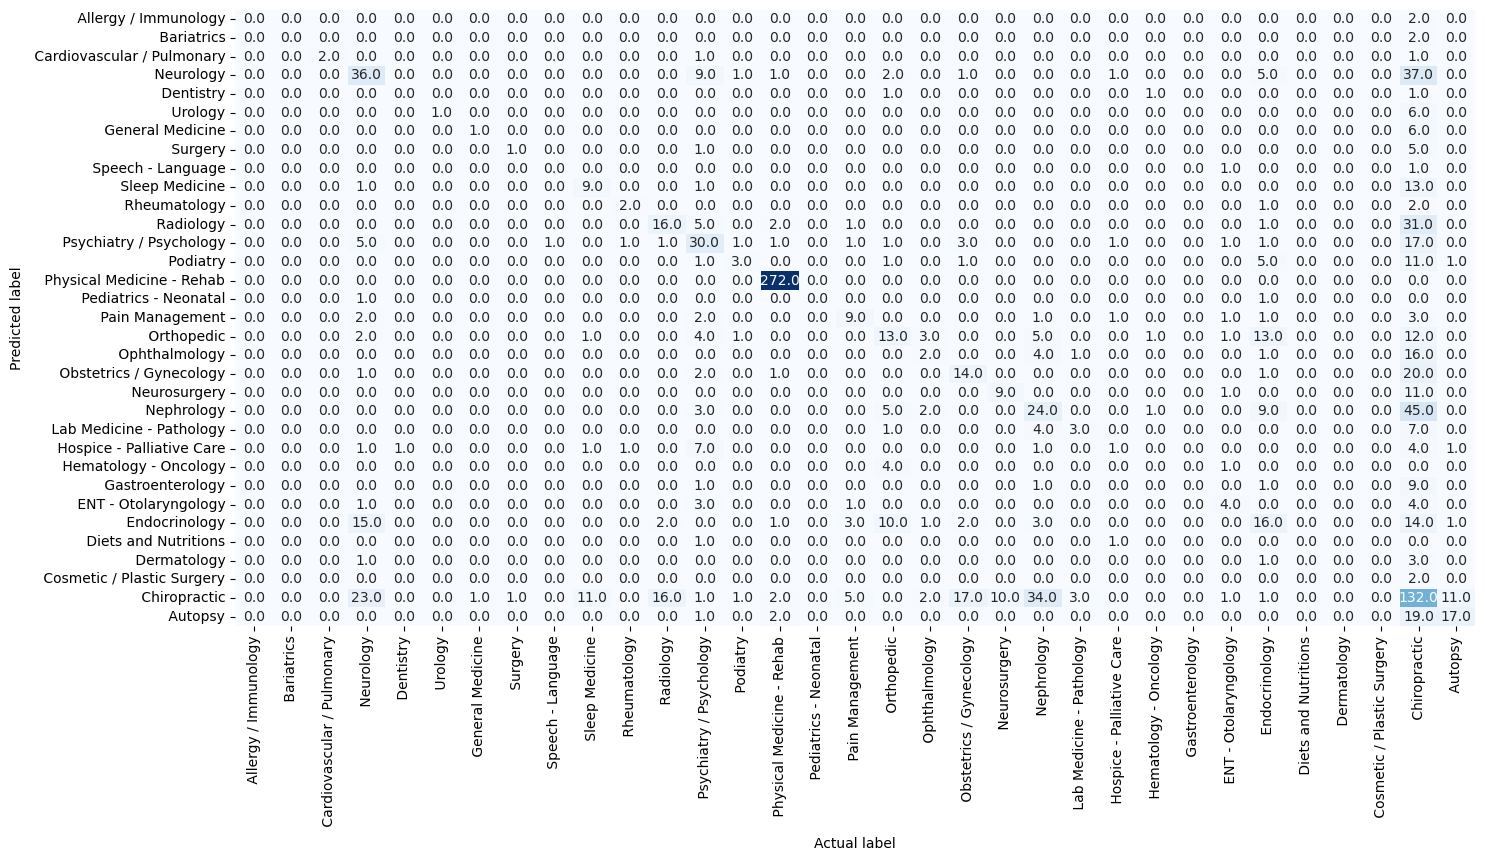

the accuracy for logistic regression with tuning : 0.48430141287284145
the f1 score for logistic regression with tuning : 0.47086458336004106
the Precision for logistic regression with tuning : 0.4825152043354048
the Recall for logistic regression with tuning : 0.48430141287284145


(LogisticRegression(C=1, multi_class='multinomial', penalty='l1',
                    random_state=42, solver='saga'),
 0.48430141287284145,
 0.47086458336004106,
 0.4825152043354048,
 0.48430141287284145)

In [50]:
#build logistic regression model
logistic_reg(X_train,X_test,y_train,y_test)

### LOGISTIC REGRESSION WITH PCA

In [51]:
#do feature dimension reduction using PCA
pca = PCA(n_components=0.95)
tfidfMat_reduced = pca.fit_transform(tfidfMat.toarray())
labels = df_1['medical_specialty'].tolist()
category_list = df.medical_specialty.unique()

In [52]:
# Use smote for imbalanced data 
smote_over_sample = SMOTE(sampling_strategy='minority')
labels = df_1['medical_specialty'].tolist()
X_pca, y_pca = smote_over_sample.fit_resample(tfidfMat_reduced, labels)
# do the train test split after PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, stratify=y_pca,random_state=1)   
print('Train_Set_Size:'+str(X_train_pca.shape))
print('Test_Set_Size:'+str(X_test_pca.shape))

Train_Set_Size:(3820, 1266)
Test_Set_Size:(1274, 1266)


With PCA the number reduced to 1266.

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
CLASSIFICATION REPORT for LogisticRegression(C=1, multi_class='multinomial', penalty='l1',
                   random_state=42, solver='saga')

                             precision    recall  f1-score   support

       Allergy / Immunology       0.00      0.00      0.00         2
                 Bariatrics       0.00      0.00      0.00         2
 Cardiovascular / Pulmonary       0.00      0.00      0.00         4
                  Neurology       0.45      0.45      0.45        93
                  Dentistry       0.00      0.00      0.00         3
                    Urology       0.00      0.00      0.00         7
           General Medicine       0.50      0.14      0.22         7
                    Surgery       0.00      0.00      0.00         7
          Speech - Language       0.00      0.00      0.00         2
             Sleep Medicine       0.50      0.42      0.45 

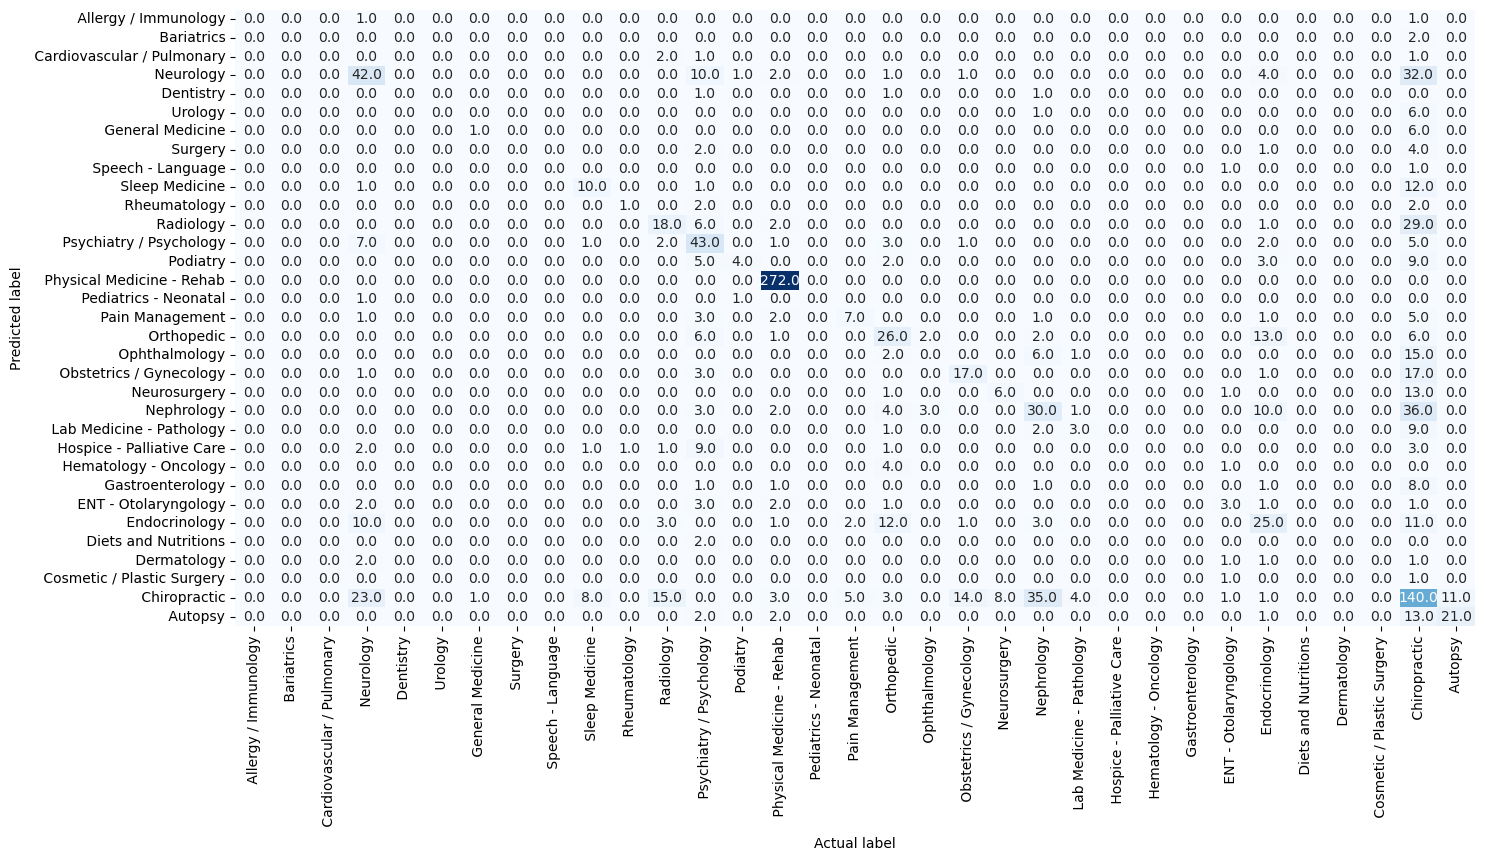

the accuracy for logistic regression with tuning : 0.5251177394034537
the f1 score for logistic regression with tuning : 0.5020251601491772
the Precision for logistic regression with tuning : 0.4979722981648382
the Recall for logistic regression with tuning : 0.5251177394034537


(LogisticRegression(C=1, multi_class='multinomial', penalty='l1',
                    random_state=42, solver='saga'),
 0.5251177394034537,
 0.5020251601491772,
 0.4979722981648382,
 0.5251177394034537)

In [53]:
#build logistic regression model
logistic_reg(X_train_pca,X_test_pca,y_train_pca,y_test_pca)

## DECISION TREE MODEL 

In [54]:
def decision_tree(X_train,X_test,y_train,y_test):
    # define params
    
    dt_grid = {"max_depth": [2, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
    # Setup grid hyperparameter search for LogisticRegression
    dt_hpt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                param_grid=dt_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)


    # Fit random hyperparameter search model
    dt_hpt.fit(X_train, y_train)
    print(dt_hpt.best_params_)
    dt_best_dtc = dt_hpt.best_estimator_
    #predict the y for test
    y_pred=dt_best_dtc.predict(X_test)
    #evaluate the model
    eval_model(y_test,y_pred,dt_best_dtc)
    
    
    ACC_dt=accuracy_score(y_test,y_pred)
    print('the accuracy for decision tree with tuning :', ACC_dt)
    f1_dt=f1_score(y_test,y_pred,average="weighted")
    print('the f1 score for decision_tree with tuning :', f1_dt)
    Precision_dt=precision_recall_fscore_support(y_test, y_pred, average='weighted')[0]
    print('the Precision for decision_tree with tuning :', Precision_dt)
    Recall_dt=precision_recall_fscore_support(y_test, y_pred, average='weighted')[1]
    print('the Recall for decision tree with tuning :', Recall_dt)
    
    return dt_best_dtc,ACC_dt,f1_dt,Precision_dt,Recall_dt
    

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
{'max_depth': 5, 'min_samples_leaf': 17, 'min_samples_split': 2}
CLASSIFICATION REPORT for DecisionTreeClassifier(max_depth=5, min_samples_leaf=17, random_state=42)

                             precision    recall  f1-score   support

       Allergy / Immunology       0.00      0.00      0.00         2
                 Bariatrics       0.00      0.00      0.00         2
 Cardiovascular / Pulmonary       0.00      0.00      0.00         4
                  Neurology       0.19      0.22      0.20        93
                  Dentistry       0.00      0.00      0.00         3
                    Urology       0.00      0.00      0.00         7
           General Medicine       0.00      0.00      0.00         7
                    Surgery       0.00      0.00      0.00         7
          Speech - Language       0.00      0.00      0.00         2
             Sleep Medicine       0.00      0.00      0.00        24
          

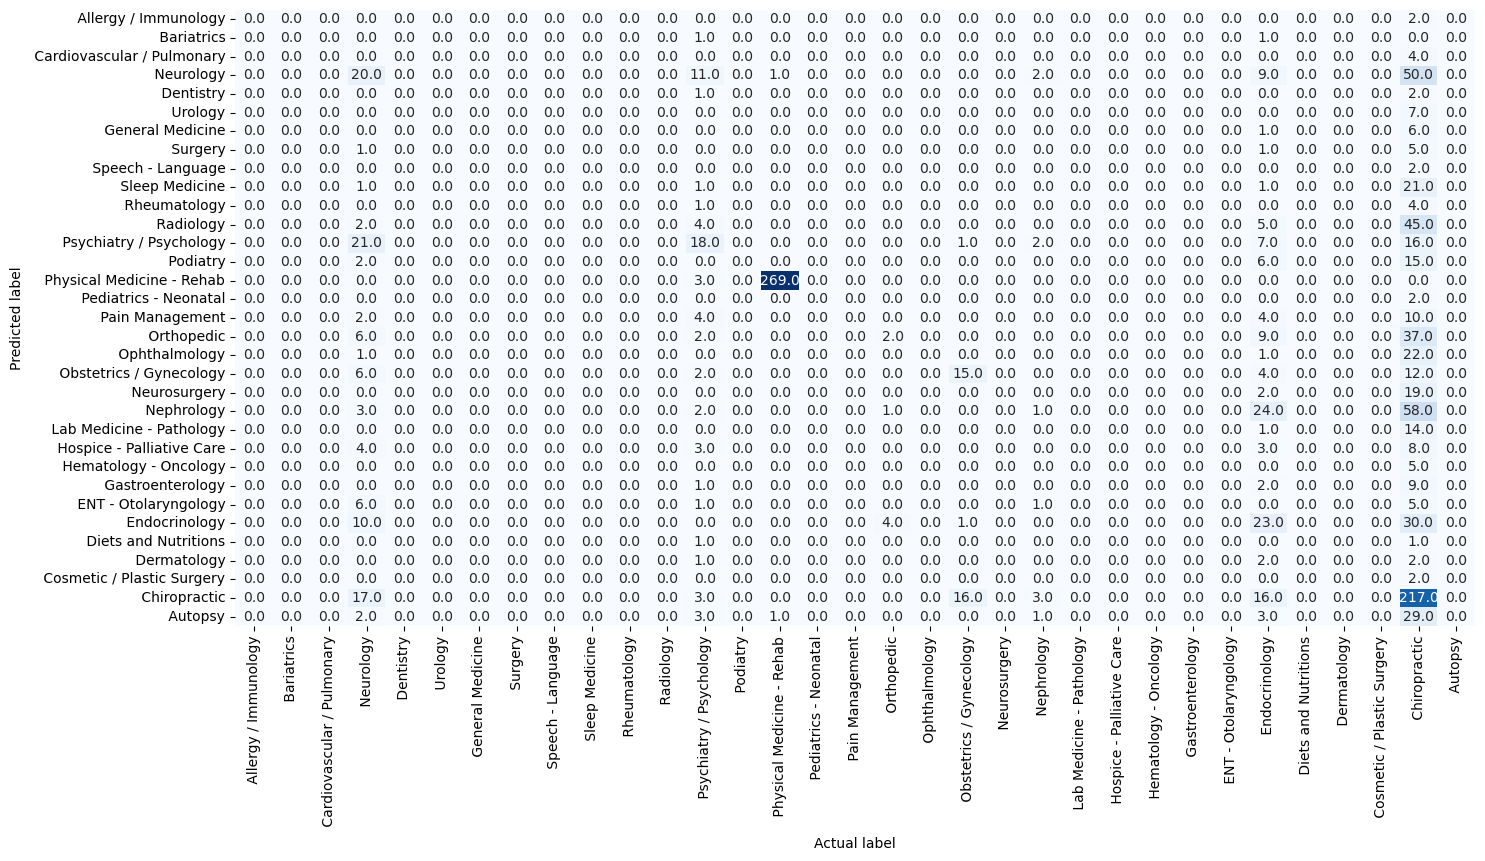

the accuracy for decision tree with tuning : 0.4434850863422292
the f1 score for decision_tree with tuning : 0.36969848625269464
the Precision for decision_tree with tuning : 0.3539112591631181
the Recall for decision tree with tuning : 0.4434850863422292


(DecisionTreeClassifier(max_depth=5, min_samples_leaf=17, random_state=42),
 0.4434850863422292,
 0.36969848625269464,
 0.3539112591631181,
 0.4434850863422292)

In [55]:
# build decision tree model
decision_tree(X_train,X_test,y_train,y_test)

### DECISION TREE WITH PCA

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
{'max_depth': 5, 'min_samples_leaf': 19, 'min_samples_split': 2}
CLASSIFICATION REPORT for DecisionTreeClassifier(max_depth=5, min_samples_leaf=19, random_state=42)

                             precision    recall  f1-score   support

       Allergy / Immunology       0.00      0.00      0.00         2
                 Bariatrics       0.00      0.00      0.00         2
 Cardiovascular / Pulmonary       0.00      0.00      0.00         4
                  Neurology       0.36      0.23      0.28        93
                  Dentistry       0.00      0.00      0.00         3
                    Urology       0.00      0.00      0.00         7
           General Medicine       0.00      0.00      0.00         7
                    Surgery       0.00      0.00      0.00         7
          Speech - Language       0.00      0.00      0.00         2
             Sleep Medicine       0.00      0.00      0.00        24
          

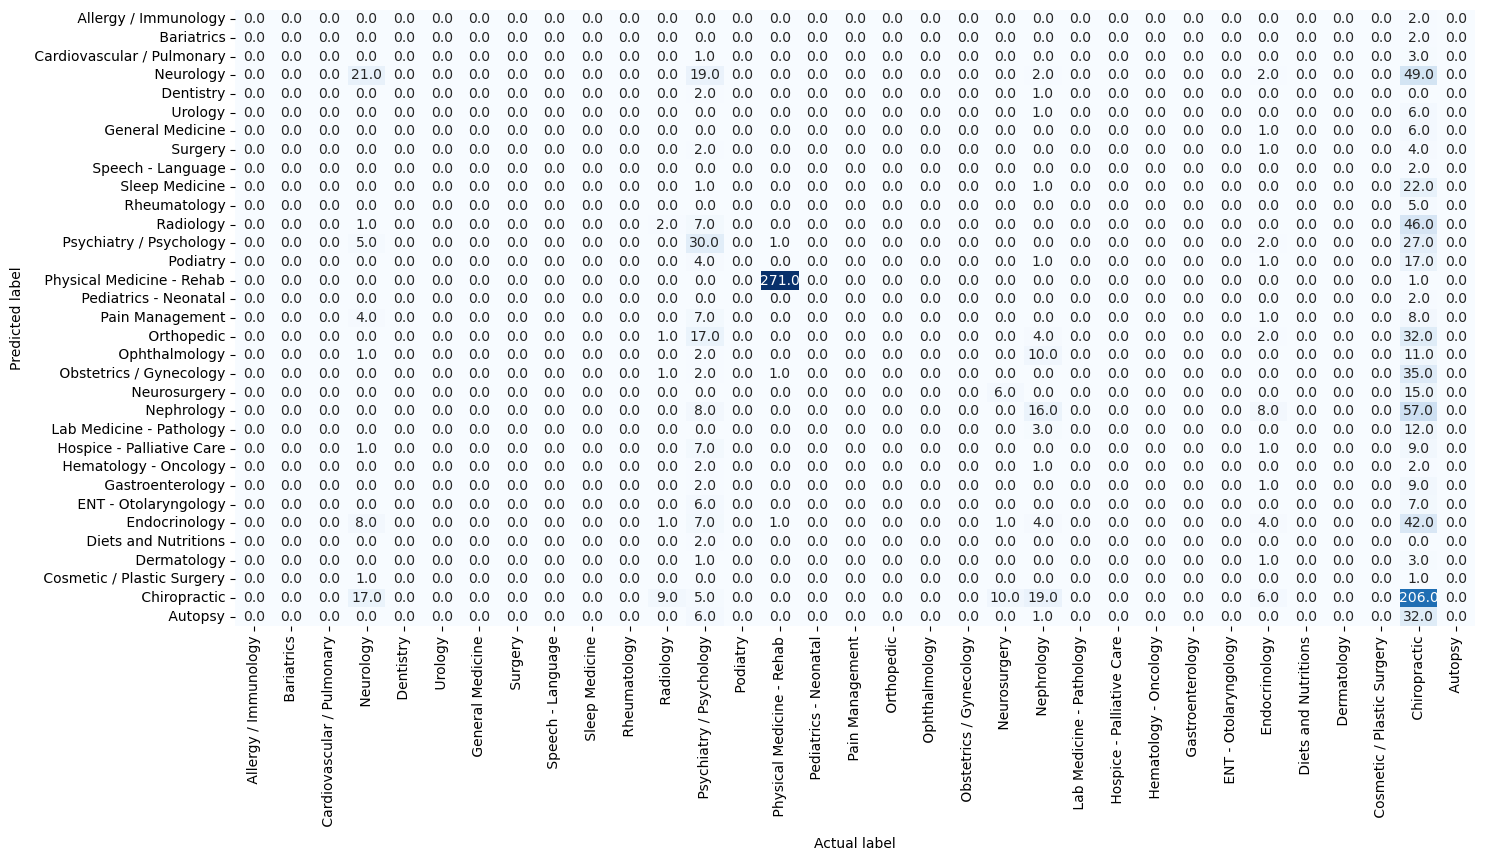

the accuracy for decision tree with tuning : 0.4364207221350079
the f1 score for decision_tree with tuning : 0.36656655373159663
the Precision for decision_tree with tuning : 0.3496848451951997
the Recall for decision tree with tuning : 0.4364207221350079


(DecisionTreeClassifier(max_depth=5, min_samples_leaf=19, random_state=42),
 0.4364207221350079,
 0.36656655373159663,
 0.3496848451951997,
 0.4364207221350079)

In [56]:
# Decision tree model with PCA
decision_tree(X_train_pca,X_test_pca,y_train_pca,y_test_pca)

## RANDOM FOREST MODEL

In [57]:
#Write a function for random forest model
def random_forest(X_train,X_test,y_train,y_test):
    # define params
    
    rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           'max_depth': [None,30,32,35,37,38,39,40],
            'min_samples_split': [2,150,170,180,190,200],
           "min_samples_leaf": np.arange(1, 20, 2)}
    # Setup grid hyperparameter search for LogisticRegression
    rf_hpt = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                param_distributions=rf_grid,
                                cv=5,
                                scoring='accuracy',
                                verbose=True,
                                n_jobs=-1)

    # Fit random hyperparameter search model
    rf_hpt.fit(X_train, y_train)
    print(rf_hpt.best_params_)
    rf_best = rf_hpt.best_estimator_
    #predict the y for test
    y_pred=rf_best.predict(X_test)
    #evaluate the model
    eval_model(y_test,y_pred,rf_best)
    
    
    ACC_rf=accuracy_score(y_test,y_pred)
    print('the accuracy for random_forest with tuning :', ACC_rf)
    f1_rf=f1_score(y_test,y_pred,average="weighted")
    print('the f1 score for random_forest with tuning :', f1_rf)
    Precision_rf=precision_recall_fscore_support(y_test, y_pred, average='weighted')[0]
    print('the Precision for random_forest with tuning :', Precision_rf)
    Recall_rf=precision_recall_fscore_support(y_test, y_pred, average='weighted')[1]
    print('the Recall for logistic regression with tuning :', Recall_rf)
    
    return rf_best,ACC_rf,f1_rf,Precision_rf,Recall_rf
    

### RANDOM FOREST WITHOUT PCA

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 260, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 38}
CLASSIFICATION REPORT for RandomForestClassifier(max_depth=38, min_samples_leaf=5, n_estimators=260,
                       random_state=42)

                             precision    recall  f1-score   support

       Allergy / Immunology       0.00      0.00      0.00         2
                 Bariatrics       0.00      0.00      0.00         2
 Cardiovascular / Pulmonary       0.00      0.00      0.00         4
                  Neurology       0.41      0.35      0.38        93
                  Dentistry       0.00      0.00      0.00         3
                    Urology       0.00      0.00      0.00         7
           General Medicine       0.00      0.00      0.00         7
                    Surgery       0.00      0.00      0.00         7
          Speech - Language       0.00      0.00      0.00         2
             Sleep M

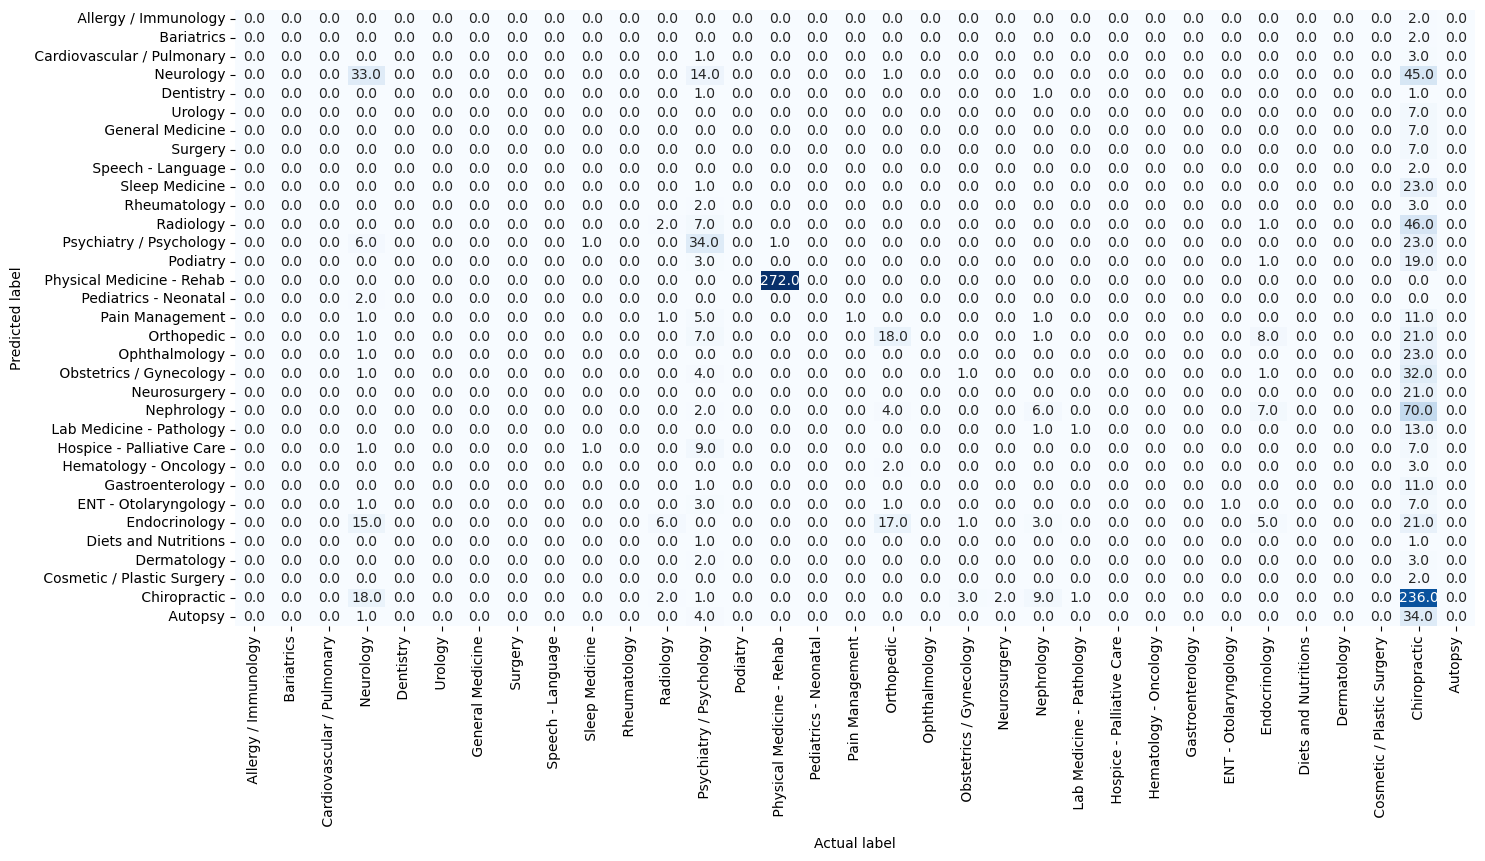

the accuracy for random_forest with tuning : 0.478806907378336
the f1 score for random_forest with tuning : 0.4023675321549163
the Precision for random_forest with tuning : 0.4257941490756733
the Recall for logistic regression with tuning : 0.478806907378336


(RandomForestClassifier(max_depth=38, min_samples_leaf=5, n_estimators=260,
                        random_state=42),
 0.478806907378336,
 0.4023675321549163,
 0.4257941490756733,
 0.478806907378336)

In [58]:
random_forest(X_train,X_test,y_train,y_test)

### RANDOM FOREST WITH PCA

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 10, 'min_samples_split': 150, 'min_samples_leaf': 1, 'max_depth': 35}
CLASSIFICATION REPORT for RandomForestClassifier(max_depth=35, min_samples_split=150, n_estimators=10,
                       random_state=42)

                             precision    recall  f1-score   support

       Allergy / Immunology       0.00      0.00      0.00         2
                 Bariatrics       0.00      0.00      0.00         2
 Cardiovascular / Pulmonary       0.00      0.00      0.00         4
                  Neurology       0.40      0.18      0.25        93
                  Dentistry       0.00      0.00      0.00         3
                    Urology       0.00      0.00      0.00         7
           General Medicine       0.00      0.00      0.00         7
                    Surgery       0.00      0.00      0.00         7
          Speech - Language       0.00      0.00      0.00         2
             Slee

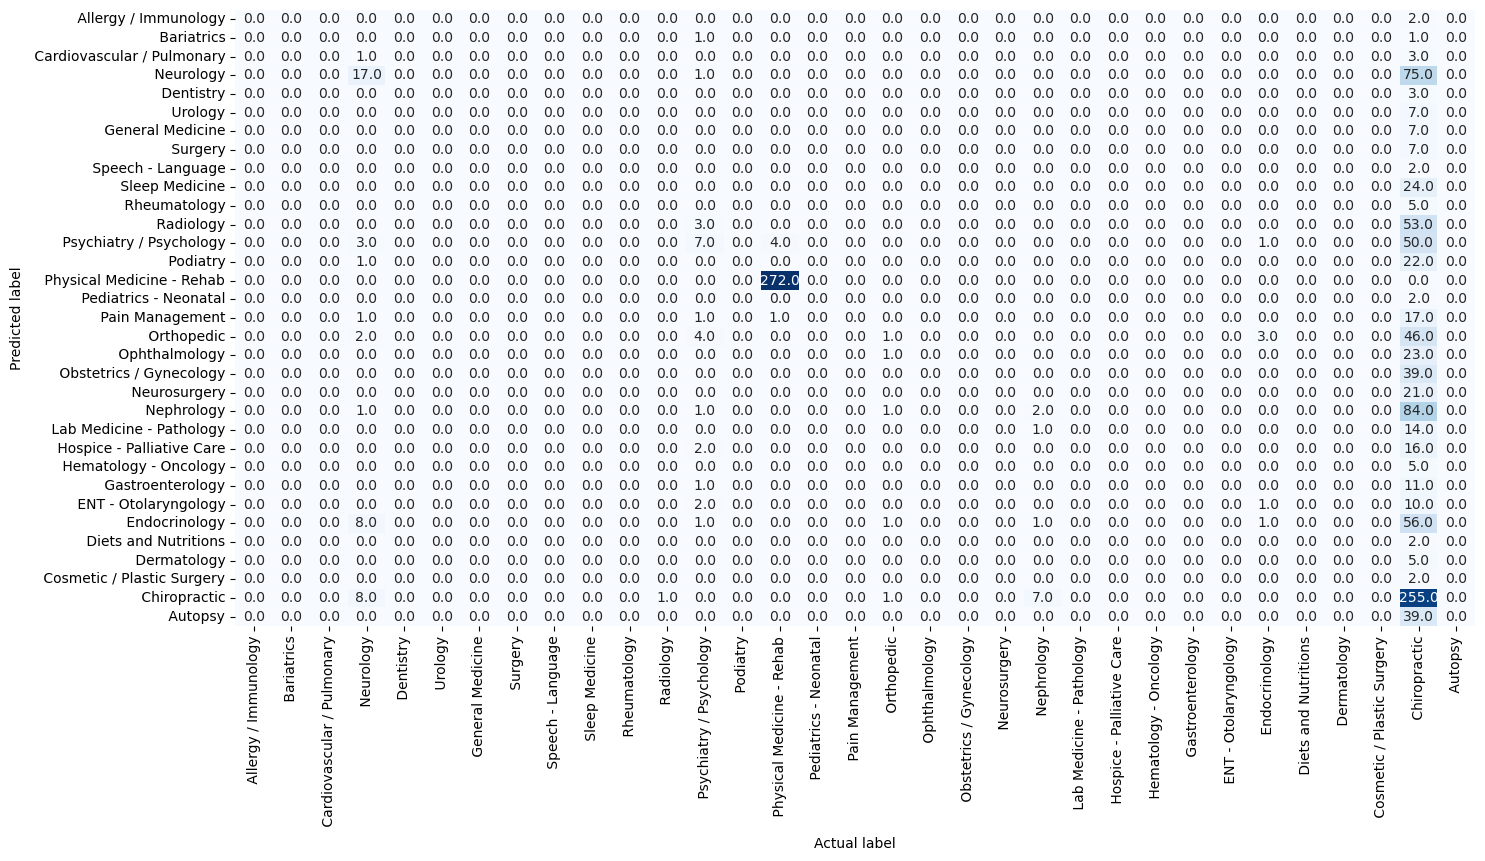

the accuracy for random_forest with tuning : 0.43563579277864994
the f1 score for random_forest with tuning : 0.3359206714593109
the Precision for random_forest with tuning : 0.344422495994632
the Recall for logistic regression with tuning : 0.43563579277864994


(RandomForestClassifier(max_depth=35, min_samples_split=150, n_estimators=10,
                        random_state=42),
 0.43563579277864994,
 0.3359206714593109,
 0.344422495994632,
 0.43563579277864994)

In [59]:

random_forest(X_train_pca,X_test_pca,y_train_pca,y_test_pca)

## NAIVE BAYES MODEL

In [60]:
#Write a model for naive bayes
def naive_b(X_train,X_test,y_train,y_test):
   
   #build naive bayes model
    naive_b = MultinomialNB()
    naive_b.fit(X_train, y_train)
    MultinomialNB()
    #predict y for test
    y_pred=naive_b.predict(X_test)
    #evaluate the model
    eval_model(y_test,y_pred,naive_b)
    
    
    ACC_nv=accuracy_score(y_test,y_pred)
    print('the accuracy for Naive Bayes with tuning :', ACC_nv)
    f1_nv=f1_score(y_test,y_pred,average="weighted")
    print('the f1 score for Naive Bayes with tuning :', f1_nv)
    Precision_nv=precision_recall_fscore_support(y_test, y_pred, average='weighted')[0]
    print('the Precision for Naive Bayes with tuning :', Precision_nv)
    Recall_nv=precision_recall_fscore_support(y_test, y_pred, average='weighted')[1]
    print('the Recall for Naive Bayes with tuning :', Recall_nv)
    
    return naive_b,ACC_nv,f1_nv,Precision_nv,Recall_nv

CLASSIFICATION REPORT for MultinomialNB()

                             precision    recall  f1-score   support

       Allergy / Immunology       0.00      0.00      0.00         2
                 Bariatrics       0.00      0.00      0.00         2
 Cardiovascular / Pulmonary       0.00      0.00      0.00         4
                  Neurology       0.38      0.22      0.27        93
                  Dentistry       0.00      0.00      0.00         3
                    Urology       0.00      0.00      0.00         7
           General Medicine       0.00      0.00      0.00         7
                    Surgery       0.00      0.00      0.00         7
          Speech - Language       0.00      0.00      0.00         2
             Sleep Medicine       0.00      0.00      0.00        24
               Rheumatology       0.00      0.00      0.00         5
                  Radiology       0.00      0.00      0.00        56
    Psychiatry / Psychology       0.44      0.17      0.24 

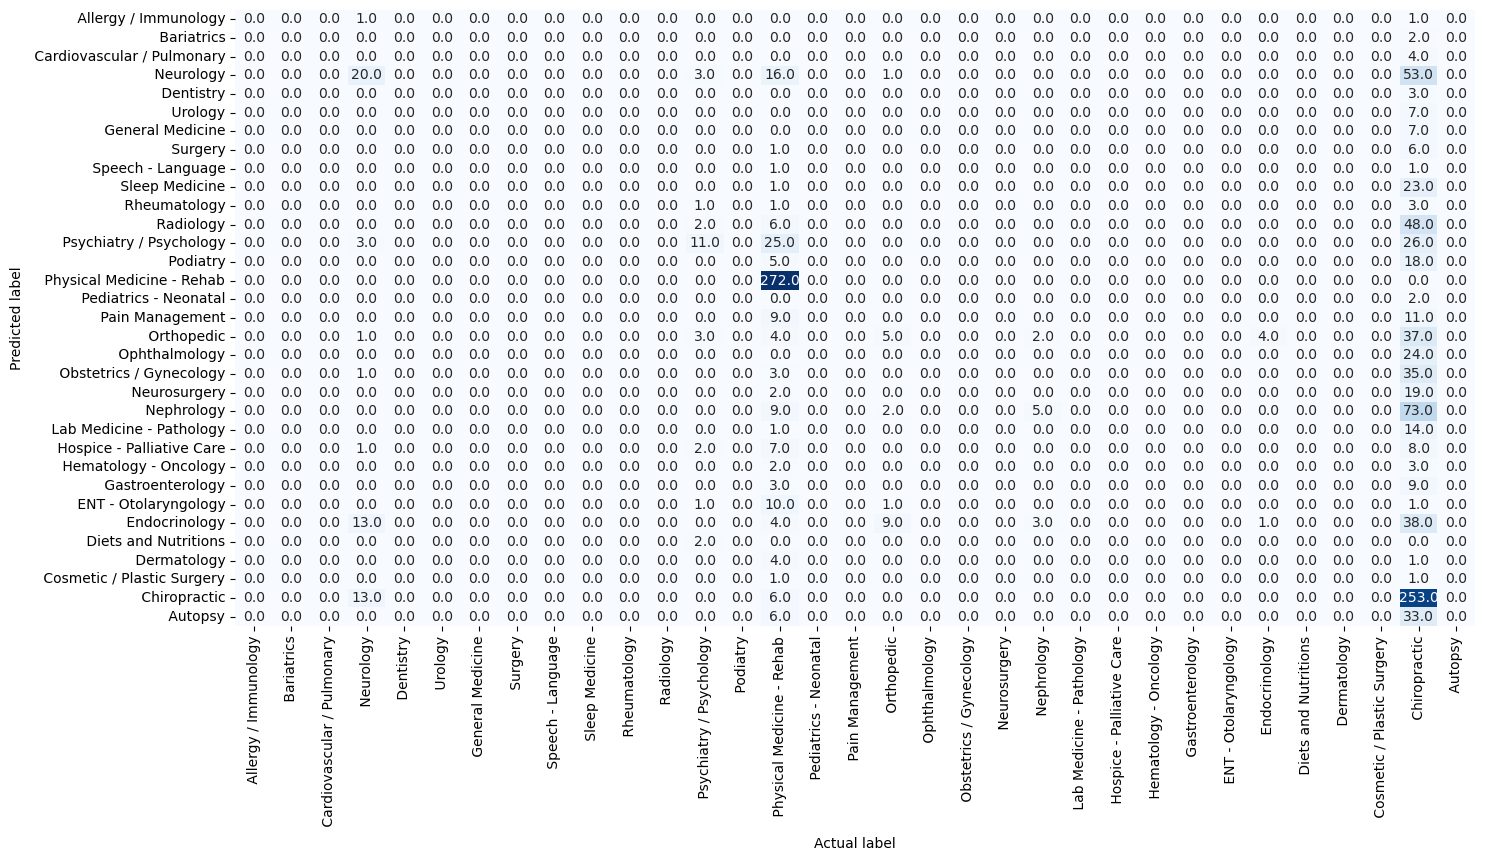

the accuracy for Naive Bayes with tuning : 0.44505494505494503
the f1 score for Naive Bayes with tuning : 0.324298956798487
the Precision for Naive Bayes with tuning : 0.32405553571802165
the Recall for Naive Bayes with tuning : 0.44505494505494503


(MultinomialNB(),
 0.44505494505494503,
 0.324298956798487,
 0.32405553571802165,
 0.44505494505494503)

In [61]:
naive_b(X_train,X_test,y_train,y_test)

The results are okay but not good. The best model sofar with or without PCA is logistic regression.


We will now apply some domain knowledge and see if we can improve the results.
As the transcription text for a number of medical speciality is overlapping, we will make following changes:

As Neurology and Neurosurgery although two seperate branches, both deal with Brain and nervous system disorders, we can merge them into one category-"Neurology/Neurosurgery"

Similarly Urology and Nephrology although two seperate branches, both deal with kidney and urinary tract disorders, so we can merge into one category-"Nephrology/Urology"

Also, as Pain mangement and palliative treatment goes together mostly, we can merge them together as "pain and palliative"



In [62]:
  # merge Neurology&Neurosurgery 
    
df["medical_specialty"]=[" Neurology/Neurosurgery"if x in [' Neurosurgery',' Neurology']else x for x in df["medical_specialty"]]    

In [63]:
#merge  Urology&Nephrology
df["medical_specialty"]=[" Urology/Nephrology"if x in [' Urology',' Nephrology']else x for x in df["medical_specialty"]]

In [64]:
# merger ' Pain Management',' Hospice - Palliative Care'
df["medical_specialty"]=[" Pain and Palliative"if x in [' Pain Management',' Hospice - Palliative Care']else x for x in df["medical_specialty"]]

In [65]:
df["medical_specialty"].value_counts().to_frame()

medical_specialty
 Surgery                                  1088
 Cardiovascular / Pulmonary                371
 Orthopedic                                355
 Neurology/Neurosurgery                    317
 Radiology                                 273
 General Medicine                          259
 Urology/Nephrology                        237
 Gastroenterology                          224
 Obstetrics / Gynecology                   155
 ENT - Otolaryngology                       96
 Hematology - Oncology                      90
 Ophthalmology                              83
 Pediatrics - Neonatal                      70
 Pain and Palliative                        67
 Psychiatry / Psychology                    53
 Podiatry                                   47
 Dermatology                                29
 Cosmetic / Plastic Surgery                 27
 Dentistry                                  27
 Physical Medicine - Rehab                  21
 Sleep Medicine                             20
 Endocrinology                              19
 Bariatrics                                 18
 Chiropractic                               14
 Rheumatology                               10
 Diets and Nutritions                       10
 Speech - Language                           9
 Autopsy                                     8
 Lab Medicine - Pathology                    8
 Allergy / Immunology                        7

Also, we will combine the specialities with less than 100 values as Others

In [66]:
counts=df["medical_specialty"].value_counts()
others = [k for k,v in counts.items() if v<50]
for each_spec in others:
    df.loc[df['medical_specialty']==each_spec,'medical_specialty']=' others' 
    
counts = df['medical_specialty'].value_counts()
print(counts)

 Surgery                       1088
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Neurology/Neurosurgery         317
 others                         274
 Radiology                      273
 General Medicine               259
 Urology/Nephrology             237
 Gastroenterology               224
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Hematology - Oncology           90
 Ophthalmology                   83
 Pediatrics - Neonatal           70
 Pain and Palliative             67
 Psychiatry / Psychology         53
Name: medical_specialty, dtype: int64


## REDUCED DATASET

In [67]:
# remove others  

df=df[df['medical_specialty'] != " others"]

In [68]:
df.head()

medical_specialty  \
3    Cardiovascular / Pulmonary   
4    Cardiovascular / Pulmonary   
7    Cardiovascular / Pulmonary   
9    Cardiovascular / Pulmonary   
11   Cardiovascular / Pulmonary   

                                        transcription  \
3   2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4   1.  The left ventricular cavity size and wall ...   
7   2-D ECHOCARDIOGRAM,Multiple views of the heart...   
9   DESCRIPTION:,1.  Normal cardiac chambers size....   
11  2-D STUDY,1. Mild aortic stenosis, widely calc...   

                                  clean_transcription  \
3   mode left atrial enlargement left atrial diame...   
4   left ventricular cavity size wall thickness ap...   
7   echocardiogrammultiple views heart great vesse...   
9   description normal cardiac chambers size norma...   
11  mild aortic stenosis widely calcified minimall...   

                                  spacy_transcription  \
3   ventricle left ventricular pericardial aortic ...   
4   left ventricular wall left ventricular outflow...   
7   echocardiogrammultiple heart vessels intracard...   
9   cardiac normal left ventricular aortic valve m...   
11  aortic ventricular ventricle mitral valves ven...   

                             lemmatized_transcription  label  
3   ventricle left ventricular pericardial aortic ...      3  
4   left ventricular wall left ventricular outflow...      3  
7   echocardiogrammultiple heart vessel intracardi...      3  
9   cardiac normal left ventricular aortic valve m...      3  
11  aortic ventricular ventricle mitral valve vent...      3

In [69]:
#check the shape
df.shape

(3738, 6)

In [70]:
# reset the index after removing others
df2=df.reset_index()
df2.drop(['index'], axis=1, inplace=True)

In [71]:
#df_biobert=df2

In [72]:
#Check the top 5 of the reduced dataset
df2.head()

medical_specialty  \
0   Cardiovascular / Pulmonary   
1   Cardiovascular / Pulmonary   
2   Cardiovascular / Pulmonary   
3   Cardiovascular / Pulmonary   
4   Cardiovascular / Pulmonary   

                                       transcription  \
0  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
1  1.  The left ventricular cavity size and wall ...   
2  2-D ECHOCARDIOGRAM,Multiple views of the heart...   
3  DESCRIPTION:,1.  Normal cardiac chambers size....   
4  2-D STUDY,1. Mild aortic stenosis, widely calc...   

                                 clean_transcription  \
0  mode left atrial enlargement left atrial diame...   
1  left ventricular cavity size wall thickness ap...   
2  echocardiogrammultiple views heart great vesse...   
3  description normal cardiac chambers size norma...   
4  mild aortic stenosis widely calcified minimall...   

                                 spacy_transcription  \
0  ventricle left ventricular pericardial aortic ...   
1  left ventricular wall left ventricular outflow...   
2  echocardiogrammultiple heart vessels intracard...   
3  cardiac normal left ventricular aortic valve m...   
4  aortic ventricular ventricle mitral valves ven...   

                            lemmatized_transcription  label  
0  ventricle left ventricular pericardial aortic ...      3  
1  left ventricular wall left ventricular outflow...      3  
2  echocardiogrammultiple heart vessel intracardi...      3  
3  cardiac normal left ventricular aortic valve m...      3  
4  aortic ventricular ventricle mitral valve vent...      3

In [73]:
#use label encoder to numeric relabel the categories in the medical specialty
le = preprocessing.LabelEncoder()
le.fit(df2['medical_specialty'])
df2['label'] = le.transform(df2['medical_specialty'])
df2.head()

medical_specialty  \
0   Cardiovascular / Pulmonary   
1   Cardiovascular / Pulmonary   
2   Cardiovascular / Pulmonary   
3   Cardiovascular / Pulmonary   
4   Cardiovascular / Pulmonary   

                                       transcription  \
0  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
1  1.  The left ventricular cavity size and wall ...   
2  2-D ECHOCARDIOGRAM,Multiple views of the heart...   
3  DESCRIPTION:,1.  Normal cardiac chambers size....   
4  2-D STUDY,1. Mild aortic stenosis, widely calc...   

                                 clean_transcription  \
0  mode left atrial enlargement left atrial diame...   
1  left ventricular cavity size wall thickness ap...   
2  echocardiogrammultiple views heart great vesse...   
3  description normal cardiac chambers size norma...   
4  mild aortic stenosis widely calcified minimall...   

                                 spacy_transcription  \
0  ventricle left ventricular pericardial aortic ...   
1  left ventricular wall left ventricular outflow...   
2  echocardiogrammultiple heart vessels intracard...   
3  cardiac normal left ventricular aortic valve m...   
4  aortic ventricular ventricle mitral valves ven...   

                            lemmatized_transcription  label  
0  ventricle left ventricular pericardial aortic ...      0  
1  left ventricular wall left ventricular outflow...      0  
2  echocardiogrammultiple heart vessel intracardi...      0  
3  cardiac normal left ventricular aortic valve m...      0  
4  aortic ventricular ventricle mitral valve vent...      0

In [74]:
# map the label codes to the categories
REVERSE=dict(zip(le.classes_, range(len(le.classes_))))
REVERSE

{' Cardiovascular / Pulmonary': 0,
 ' ENT - Otolaryngology': 1,
 ' Gastroenterology': 2,
 ' General Medicine': 3,
 ' Hematology - Oncology': 4,
 ' Neurology/Neurosurgery': 5,
 ' Obstetrics / Gynecology': 6,
 ' Ophthalmology': 7,
 ' Orthopedic': 8,
 ' Pain and Palliative': 9,
 ' Pediatrics - Neonatal': 10,
 ' Psychiatry / Psychology': 11,
 ' Radiology': 12,
 ' Surgery': 13,
 ' Urology/Nephrology': 14}

In [75]:
# create a new dataframe with only"lemmatized_transcription","label" for reduced dataset
training_data2 = df2[["lemmatized_transcription","label"]]
training_data2

lemmatized_transcription  label
0     ventricle left ventricular pericardial aortic ...      0
1     left ventricular wall left ventricular outflow...      0
2     echocardiogrammultiple heart vessel intracardi...      0
3     cardiac normal left ventricular aortic valve m...      0
4     aortic ventricular ventricle mitral valve vent...      0
...                                                 ...    ...
3733  adenosine nuclear patient heart blood heart bl...      0
3734  patient patient coronary artery patient chest ...      0
3735  patient woman sublingual nitroglycerin nitrogl...      0
3736  abc gentleman sublingual nitroglycerin patient...      0
3737  heart valvular patient female abdominal patien...      0

[3738 rows x 2 columns]

In [76]:
#get the copy of training data2 as training data
training_data= training_data2.copy()

In [77]:
#Get the Vector count
# We will be doing fit_transform on lemmatized_transcription using unigram
count_vect = CountVectorizer(ngram_range=(1,1))
X = count_vect.fit_transform(training_data['lemmatized_transcription'])
X

<3738x6127 sparse matrix of type '<class 'numpy.int64'>'
	with 95839 stored elements in Compressed Sparse Row format>

In [78]:
#Transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
tfidfMat = tfidf_transformer.fit_transform(X)

In [79]:
# feature dimension reduction using PCA
pca = PCA(n_components=0.95)
tfidfMat_reduced = pca.fit_transform(tfidfMat.toarray())
labels = df2['medical_specialty'].tolist()
category_list = df2.medical_specialty.unique()

In [80]:
tfidfMat_reduced.shape

(3738, 1227)

In [81]:
target_names= df2['medical_specialty'].unique()

In [82]:
#SMote for imbalanced dataset
smote_over_sample = SMOTE(sampling_strategy='minority')
labels = df2['medical_specialty'].tolist()
X_pca2, y_pca2 = smote_over_sample.fit_resample(tfidfMat_reduced, labels)

In [83]:
# train test split with PCA
X_train_pca2, X_test_pca2, y_train_pca2, y_test_pca2 = train_test_split(X_pca2, y_pca2, stratify=y_pca2,random_state=1)   
print('Train_Set_Size:'+str(X_train_pca2.shape))
print('Test_Set_Size:'+str(X_test_pca2.shape))

Train_Set_Size:(3579, 1227)
Test_Set_Size:(1194, 1227)


In [84]:
# Train test split without PCA
smote_over_sample = SMOTE(sampling_strategy='minority')
labels = df2['medical_specialty'].tolist()
X, y = smote_over_sample.fit_resample(tfidfMat, labels)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y,random_state=1)   
print('Train_Set_Size:'+str(X_train2.shape))
print('Test_Set_Size:'+str(X_test2.shape))

Train_Set_Size:(3579, 6127)
Test_Set_Size:(1194, 6127)


In [85]:
len(y_pca2)

4773

### LOGISTIC REGRESSION

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
CLASSIFICATION REPORT for LogisticRegression(C=1, multi_class='multinomial', penalty='l1',
                   random_state=42, solver='saga')

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.50      0.48      0.49        93
     Neurology/Neurosurgery       0.41      0.29      0.34        24
         Urology/Nephrology       0.44      0.30      0.36        56
           General Medicine       0.48      0.49      0.49        65
                    Surgery       0.36      0.17      0.24        23
                  Radiology       0.46      0.35      0.40        79
    Psychiatry / Psychology       0.46      0.41      0.43        39
      Pediatrics - Neonatal       0.73      0.38      0.50        21
        Pain and Palliative       0.38      0.30      0.34        89
                 Orthopedic       0.60      0.18      0.27 

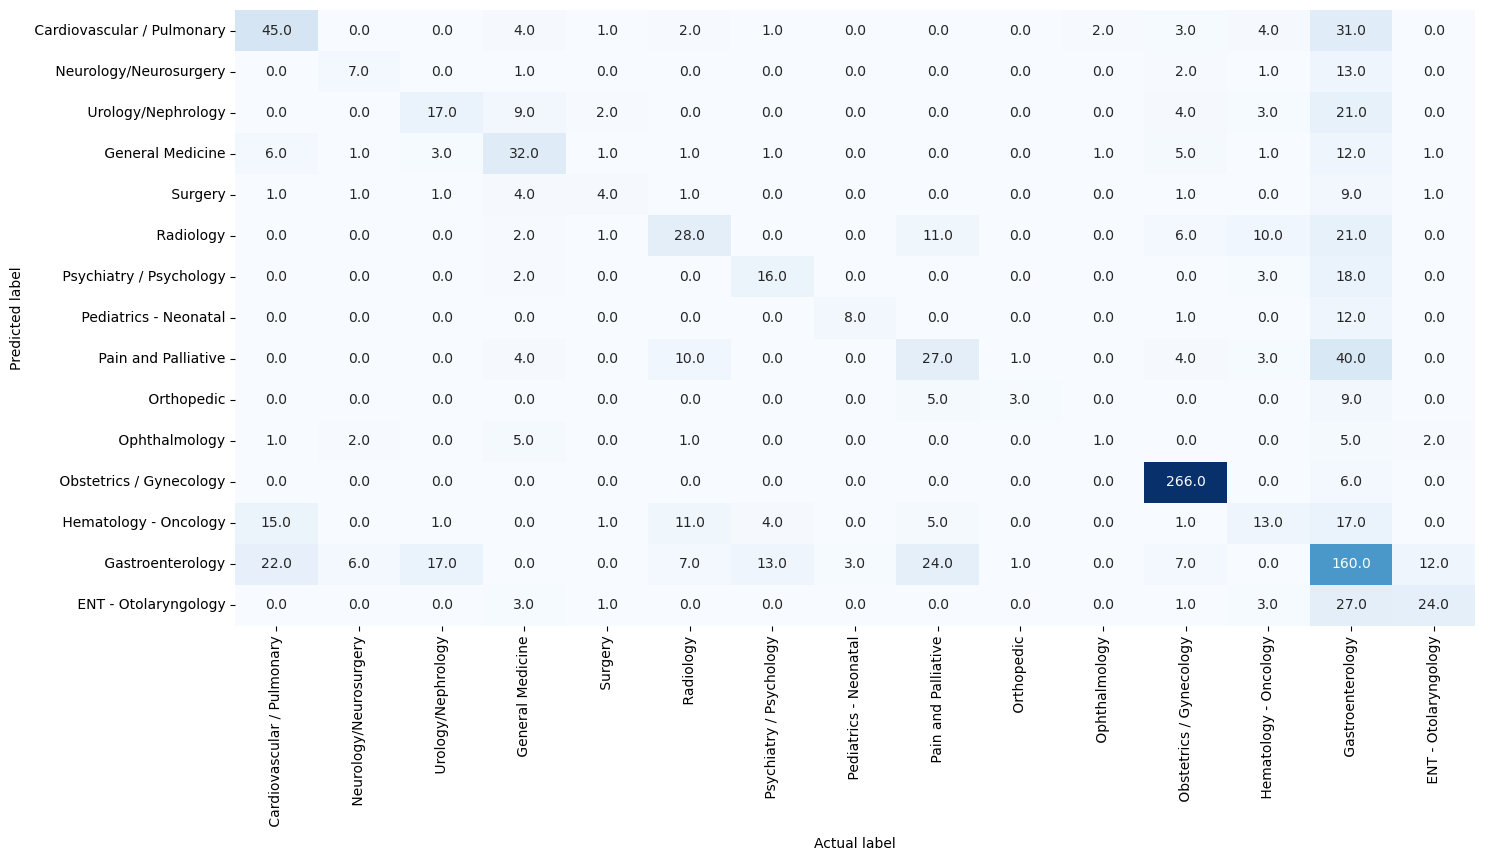

the accuracy for logistic regression with tuning : 0.5452261306532663
the f1 score for logistic regression with tuning : 0.5300743282146289
the Precision for logistic regression with tuning : 0.5391304337945879
the Recall for logistic regression with tuning : 0.5452261306532663


In [86]:
log1=logistic_reg(X_train2,X_test2,y_train2,y_test2)

In [87]:
# GET the evaluation metrics
logistic_model1=log1[0]
ACC_lr1=round(log1[1],2)
f1_lr1=round(log1[2],2)
Precision_lr1=round(log1[3],2)
Recall_lr1=round(log1[4],2)

### LOGISTIC REGRESSION WITH PCA

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
CLASSIFICATION REPORT for LogisticRegression(C=1, multi_class='multinomial', penalty='l1',
                   random_state=42, solver='saga')

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.49      0.47      0.48        93
     Neurology/Neurosurgery       0.47      0.38      0.42        24
         Urology/Nephrology       0.40      0.38      0.39        56
           General Medicine       0.51      0.62      0.56        65
                    Surgery       0.20      0.04      0.07        23
                  Radiology       0.47      0.43      0.45        79
    Psychiatry / Psychology       0.34      0.28      0.31        39
      Pediatrics - Neonatal       0.64      0.33      0.44        21
        Pain and Palliative       0.48      0.35      0.40        89
                 Orthopedic       0.44      0.24      0.31 

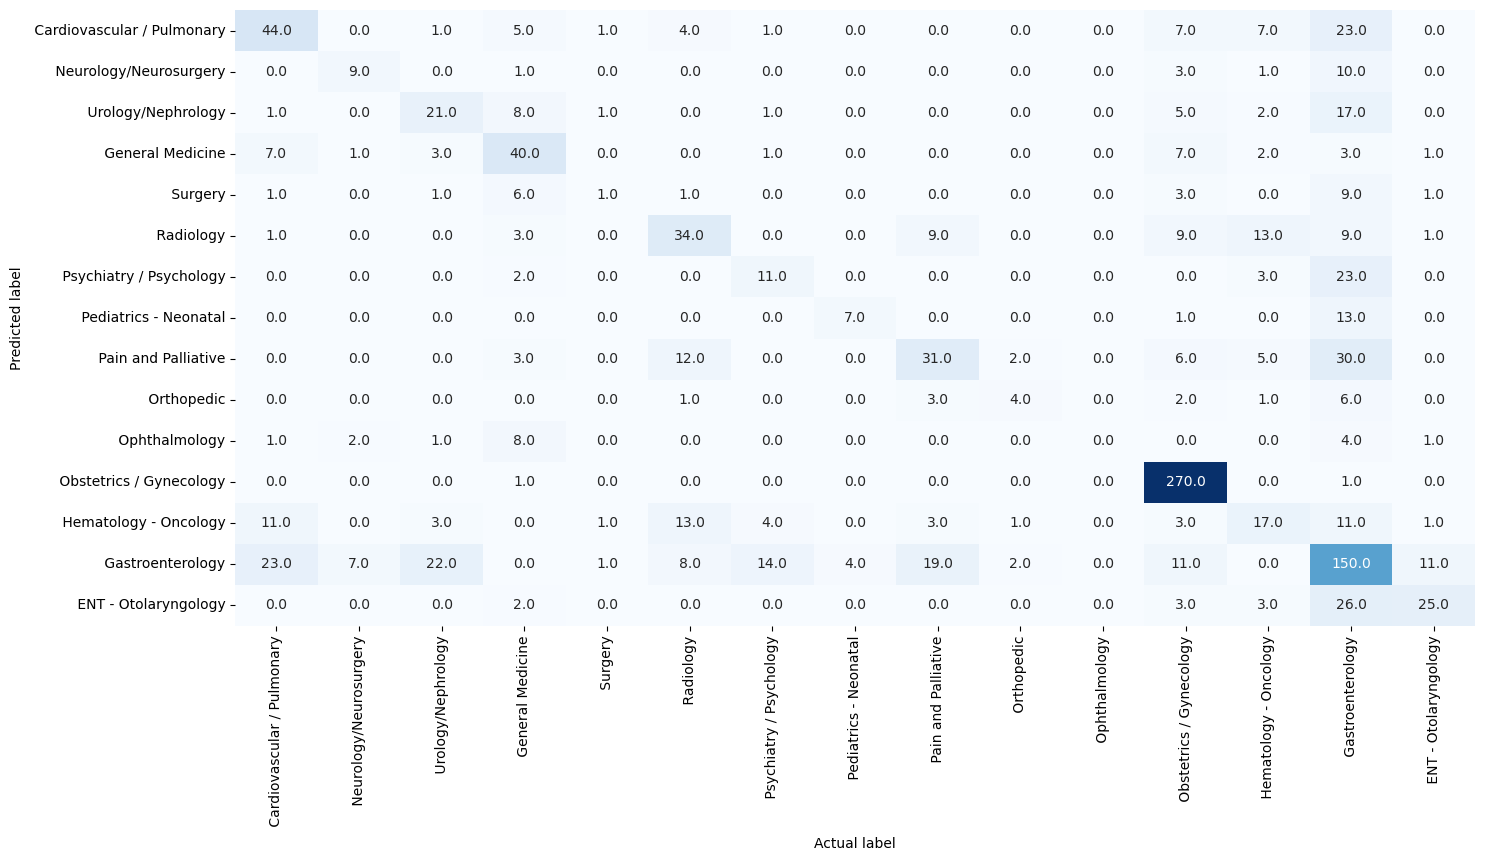

the accuracy for logistic regression with tuning : 0.5561139028475712
the f1 score for logistic regression with tuning : 0.5352516772207833
the Precision for logistic regression with tuning : 0.5299483743394783
the Recall for logistic regression with tuning : 0.5561139028475712


In [88]:
log2=logistic_reg(X_train_pca2,X_test_pca2,y_train_pca2,y_test_pca2)

In [89]:
#Evaluation metrics 
logistic_model2=log2[0]
ACC_lr2=round(log2[1],2)
f1_lr2=round(log2[2],2)
Precision_lr2=round(log2[3],2)
Recall_lr2=round(log2[4],2)

### DECISION TREE 

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 16}
CLASSIFICATION REPORT for DecisionTreeClassifier(max_depth=5, min_samples_split=16, random_state=42)

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.47      0.17      0.25        93
     Neurology/Neurosurgery       0.00      0.00      0.00        24
         Urology/Nephrology       0.00      0.00      0.00        56
           General Medicine       0.23      0.46      0.31        65
                    Surgery       1.00      0.09      0.16        23
                  Radiology       0.40      0.18      0.25        79
    Psychiatry / Psychology       0.50      0.05      0.09        39
      Pediatrics - Neonatal       0.00      0.00      0.00        21
        Pain and Palliative       0.00      0.00      0.00        89
                 Orthopedic       0.00      0.00      0.00        17
         

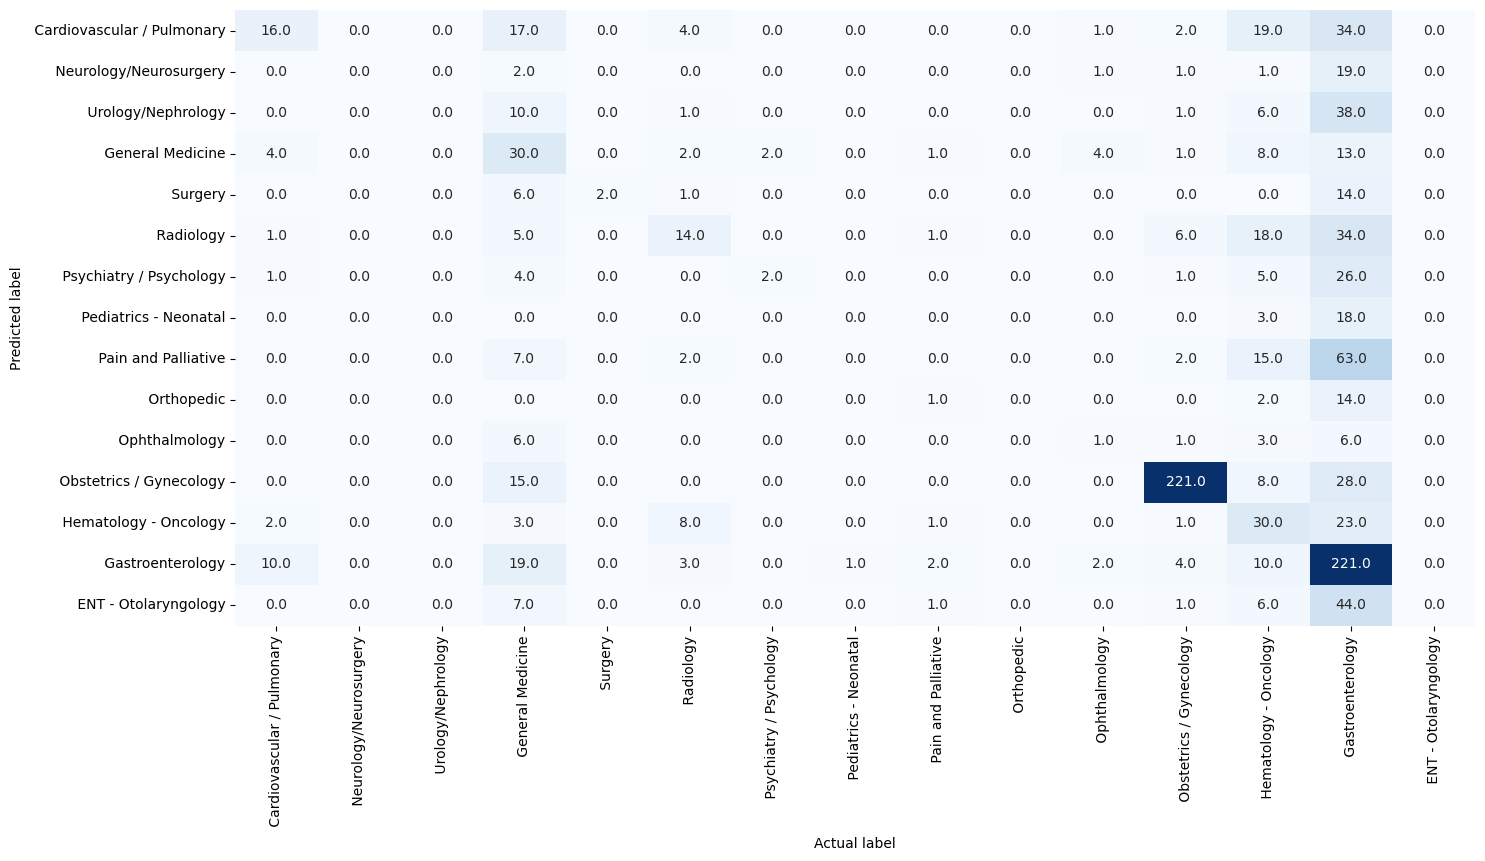

the accuracy for decision tree with tuning : 0.44974874371859297
the f1 score for decision_tree with tuning : 0.38870490557759907
the Precision for decision_tree with tuning : 0.41816435275955643
the Recall for decision tree with tuning : 0.44974874371859297


In [90]:
decision1=decision_tree(X_train2,X_test2,y_train2,y_test2)


In [91]:
# Evaluate metrics
decision_model1=decision1[0]
ACC_dt1=round(decision1[1],2)
f1_dt1=round(decision1[2],2)
Precision_dt1=round(decision1[3],2)
Recall_dt1=round(decision1[4],2)

### DECISION TREE WITH PCA

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
{'max_depth': 5, 'min_samples_leaf': 19, 'min_samples_split': 2}
CLASSIFICATION REPORT for DecisionTreeClassifier(max_depth=5, min_samples_leaf=19, random_state=42)

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.21      0.28      0.24        93
     Neurology/Neurosurgery       0.00      0.00      0.00        24
         Urology/Nephrology       0.15      0.05      0.08        56
           General Medicine       0.23      0.37      0.28        65
                    Surgery       0.00      0.00      0.00        23
                  Radiology       0.23      0.32      0.26        79
    Psychiatry / Psychology       0.35      0.23      0.28        39
      Pediatrics - Neonatal       0.57      0.62      0.59        21
        Pain and Palliative       0.25      0.08      0.12        89
                 Orthopedic       0.00      0.00      0.00        17
          

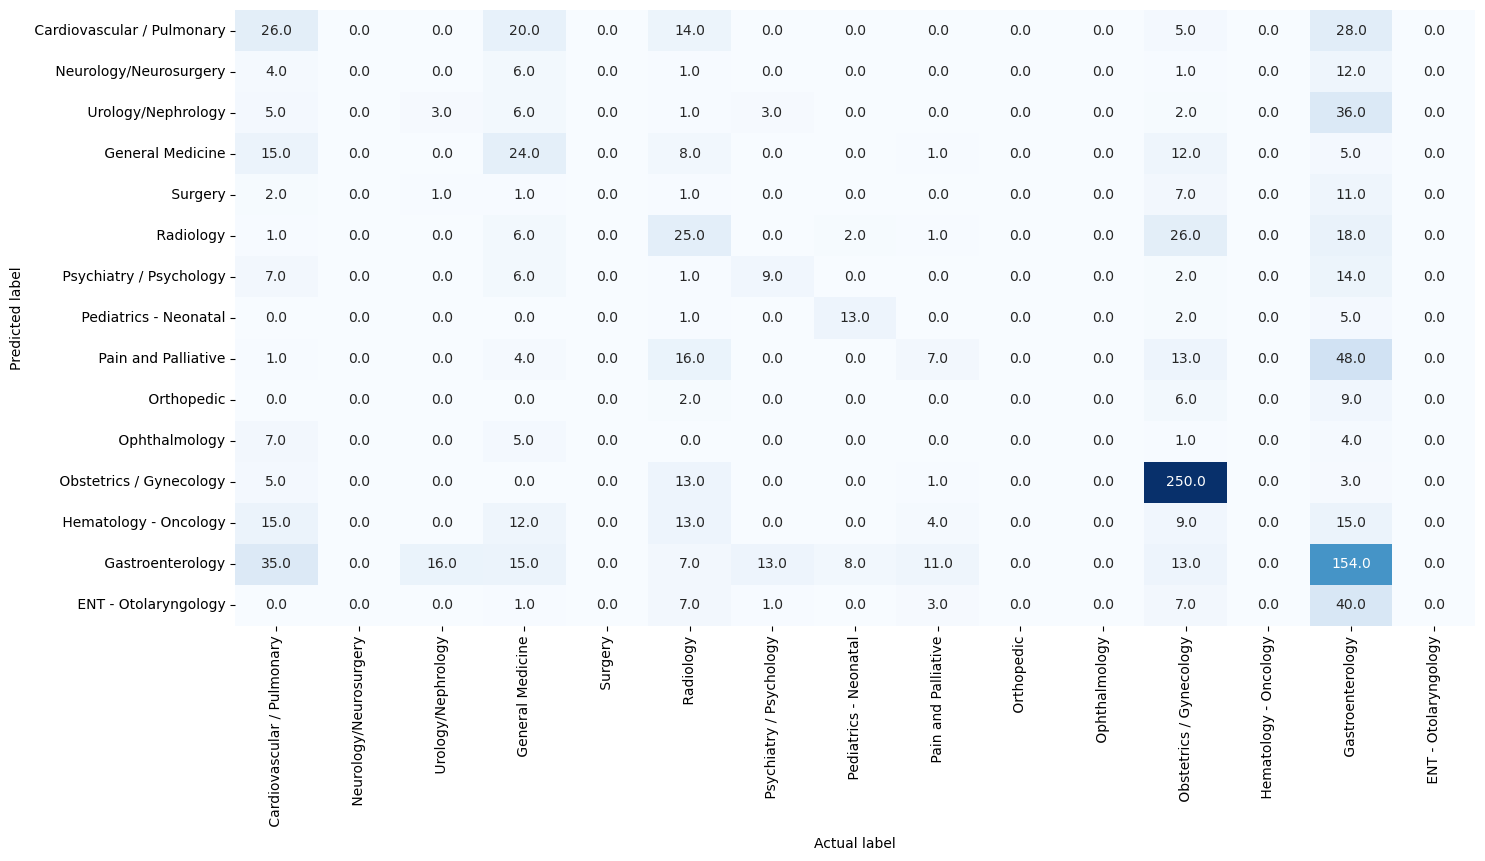

the accuracy for decision tree with tuning : 0.42797319932998323
the f1 score for decision_tree with tuning : 0.3690711352369135
the Precision for decision_tree with tuning : 0.3379898403011379
the Recall for decision tree with tuning : 0.42797319932998323


In [92]:
decision2=decision_tree(X_train_pca2,X_test_pca2,y_train_pca2,y_test_pca2)

In [93]:
#Evaluate the metrics
decision_model2=decision2[0]
ACC_dt2=round(decision2[1],2)
f1_dt2=round(decision2[2],2)
Precision_dt2=round(decision2[3],2)
Recall_dt2=round(decision2[4],2)

### RANDOM FOREST

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 10, 'min_samples_split': 190, 'min_samples_leaf': 3, 'max_depth': 38}
CLASSIFICATION REPORT for RandomForestClassifier(max_depth=38, min_samples_leaf=3, min_samples_split=190,
                       n_estimators=10, random_state=42)

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.40      0.23      0.29        93
     Neurology/Neurosurgery       0.00      0.00      0.00        24
         Urology/Nephrology       0.14      0.02      0.03        56
           General Medicine       0.43      0.31      0.36        65
                    Surgery       0.00      0.00      0.00        23
                  Radiology       0.45      0.22      0.29        79
    Psychiatry / Psychology       0.30      0.08      0.12        39
      Pediatrics - Neonatal       0.50      0.10      0.16        21
        Pain and Palliative       0.33      0.08      0.13        

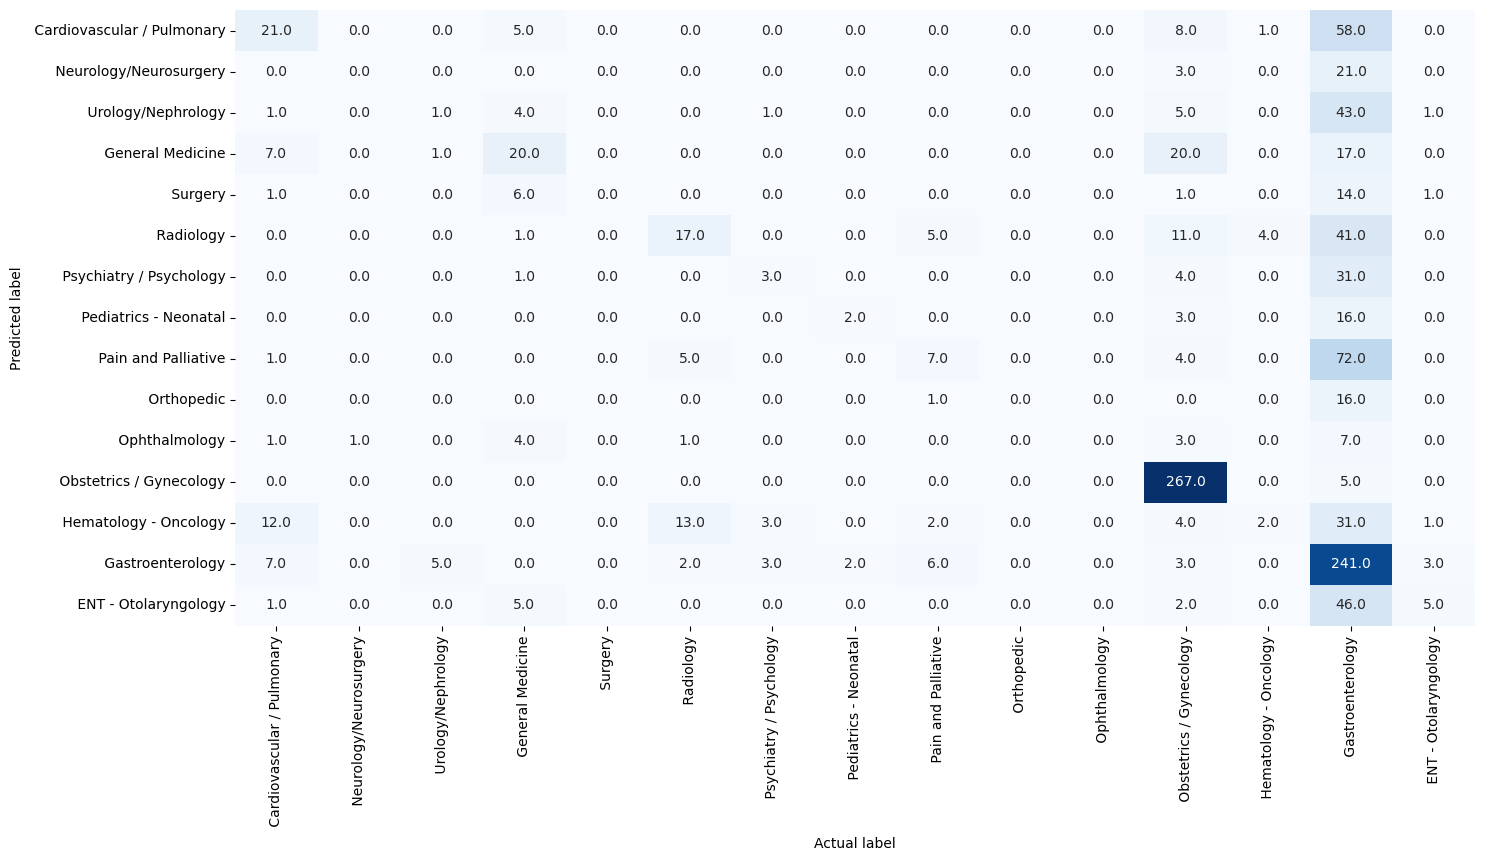

the accuracy for random_forest with tuning : 0.490787269681742
the f1 score for random_forest with tuning : 0.4066553740497604
the Precision for random_forest with tuning : 0.43685922909321495
the Recall for logistic regression with tuning : 0.490787269681742


In [94]:
random_f1=random_forest(X_train2,X_test2,y_train2,y_test2)

In [95]:
random_f_model1=random_f1[0]
ACC_rf1=round(random_f1[1],2)
f1_rf1=round(random_f1[2],2)
Precision_rf1=round(random_f1[3],2)
Recall_rf1=round(random_f1[4],2)

### RANDOM FOREST WITH PCA 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 810, 'min_samples_split': 150, 'min_samples_leaf': 1, 'max_depth': None}
CLASSIFICATION REPORT for RandomForestClassifier(min_samples_split=150, n_estimators=810, random_state=42)

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.20      0.01      0.02        93
     Neurology/Neurosurgery       0.00      0.00      0.00        24
         Urology/Nephrology       0.00      0.00      0.00        56
           General Medicine       0.00      0.00      0.00        65
                    Surgery       0.00      0.00      0.00        23
                  Radiology       0.00      0.00      0.00        79
    Psychiatry / Psychology       0.00      0.00      0.00        39
      Pediatrics - Neonatal       0.00      0.00      0.00        21
        Pain and Palliative       0.00      0.00      0.00        89
                 Orthopedic       0.00      0.00  

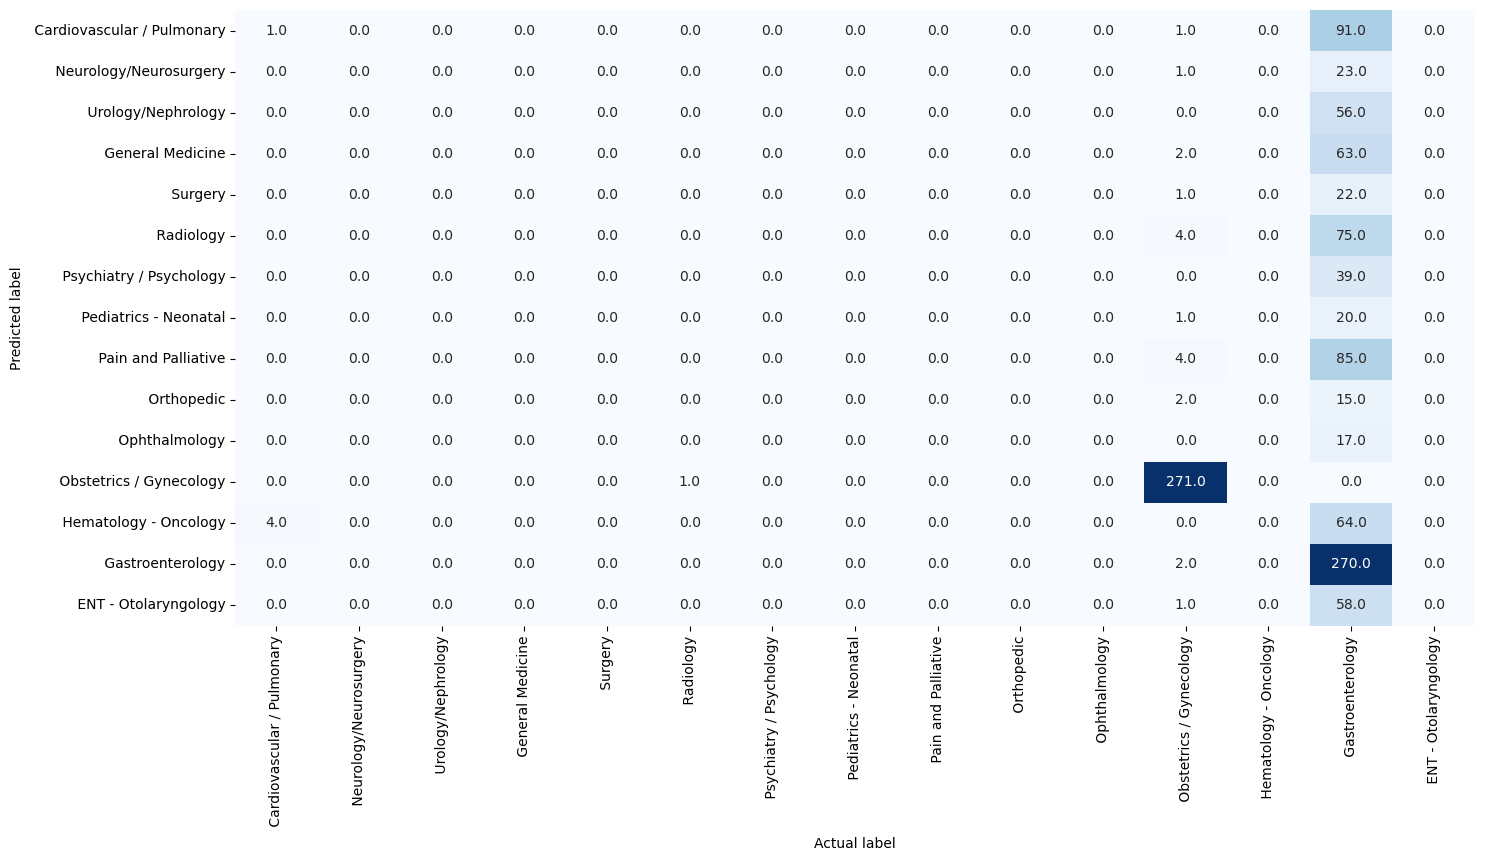

the accuracy for random_forest with tuning : 0.4539363484087102
the f1 score for random_forest with tuning : 0.3264294015239899
the Precision for random_forest with tuning : 0.29695230112109844
the Recall for logistic regression with tuning : 0.4539363484087102


In [96]:
random_f2=random_forest(X_train_pca2,X_test_pca2,y_train_pca2,y_test_pca2)

In [97]:
random_f_model2=random_f2[0]
ACC_rf2=round(random_f2[1],2)
f1_rf2=round(random_f2[2],2)
Precision_rf2=round(random_f2[3],2)
Recall_rf2=round(random_f2[4],2)

## NAIVE BAYES

CLASSIFICATION REPORT for MultinomialNB()

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.53      0.32      0.40        93
     Neurology/Neurosurgery       0.00      0.00      0.00        24
         Urology/Nephrology       0.00      0.00      0.00        56
           General Medicine       0.67      0.22      0.33        65
                    Surgery       0.00      0.00      0.00        23
                  Radiology       0.36      0.15      0.21        79
    Psychiatry / Psychology       0.00      0.00      0.00        39
      Pediatrics - Neonatal       0.00      0.00      0.00        21
        Pain and Palliative       0.27      0.03      0.06        89
                 Orthopedic       0.00      0.00      0.00        17
              Ophthalmology       0.00      0.00      0.00        17
    Obstetrics / Gynecology       0.74      1.00      0.85       272
      Hematology - Oncology       0.20      0.01      0.03 

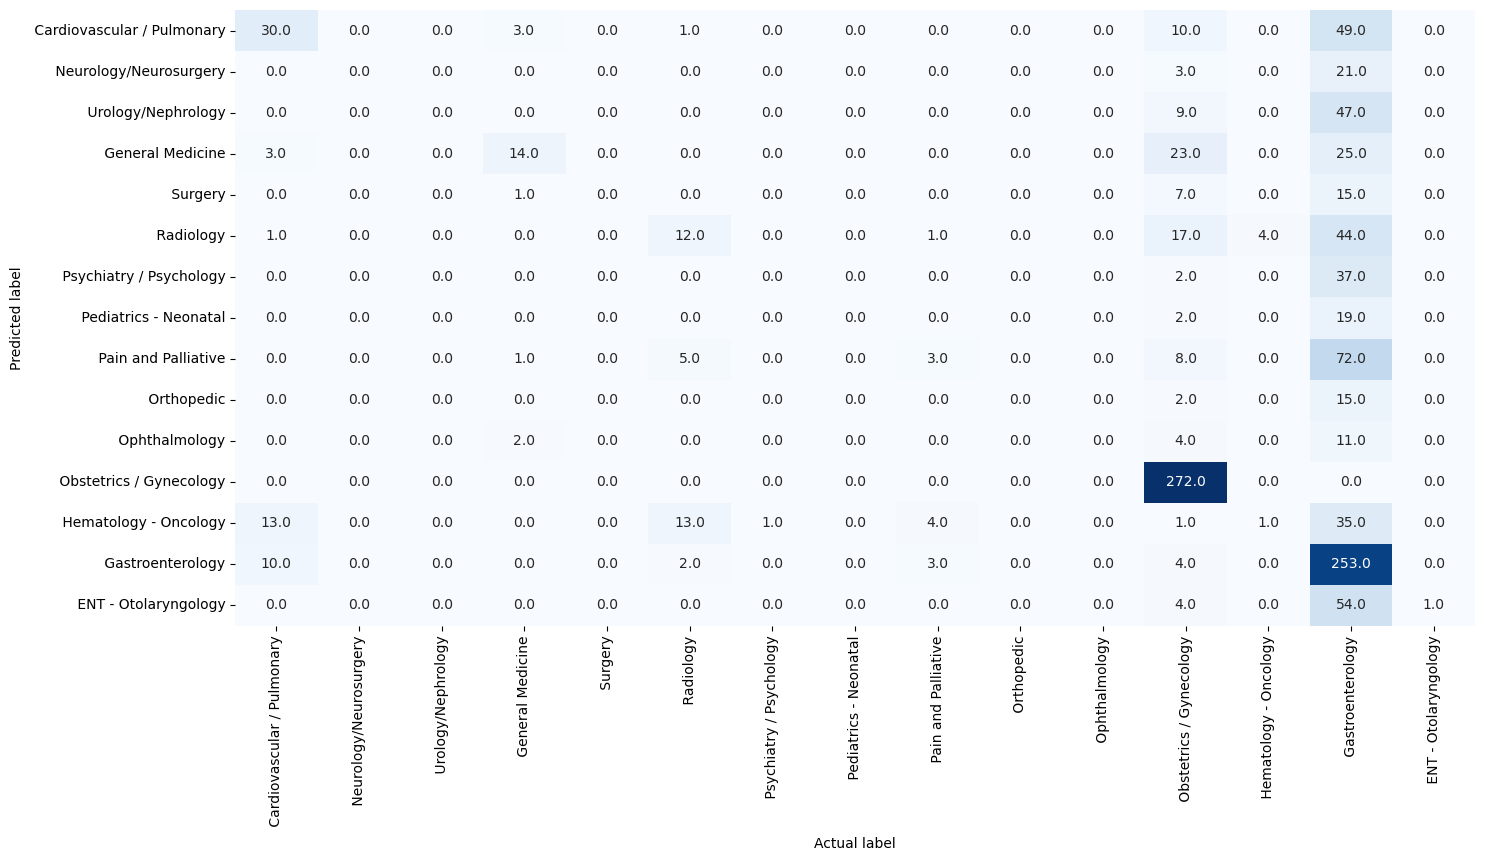

the accuracy for Naive Bayes with tuning : 0.490787269681742
the f1 score for Naive Bayes with tuning : 0.3833300923038868
the Precision for Naive Bayes with tuning : 0.43354764433193366
the Recall for Naive Bayes with tuning : 0.490787269681742


In [98]:
Naive_bay=naive_b(X_train2,X_test2,y_train2,y_test2)

In [99]:
Naive_bay_model=Naive_bay[0]
ACC_nv=round(Naive_bay[1],2)
f1_nv=round(Naive_bay[2],2)
Precision_nv=round(Naive_bay[3],2)
Recall_nv=round(Naive_bay[4],2)

## DEEP LEARNING MODELS

In [100]:
training_data = df2[["clean_transcription","label"]]
training_data

clean_transcription  label
0     mode left atrial enlargement left atrial diame...      0
1     left ventricular cavity size wall thickness ap...      0
2     echocardiogrammultiple views heart great vesse...      0
3     description normal cardiac chambers size norma...      0
4     mild aortic stenosis widely calcified minimall...      0
...                                                 ...    ...
3733  indication chest pain type test adenosine nucl...      0
3734  chief complaint chest pain history present ill...      0
3735  history present illness patient year old woman...      0
3736  history present illness mr abc year old gentle...      0
3737  reason consultation abnormal echocardiogram fi...      0

[3738 rows x 2 columns]

In [101]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from transformers import BertTokenizerFast
from sklearn.preprocessing import MultiLabelBinarizer

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from transformers import PreTrainedModel, PreTrainedTokenizer, PretrainedConfig

from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW

from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
from transformers import RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig,RobertaTokenizerFast
from transformers import XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig
from transformers import XLMForSequenceClassification, XLMTokenizer, XLMConfig
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig

## FINE TUNING ON BERT 


In [102]:
#Write function for fine tunning for transformers
def fine_tunning(model_name,sequence,tokenizer):
    
    # Set the device to CUDA if available, otherwise use CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    num_epochs = 25
    # Load the pre-trained BERT model and tokenizer
    model_name = model_name
    model = sequence.from_pretrained(model_name, num_labels=15)
    tokenizer = tokenizer.from_pretrained(model_name)

    # Move the model to the device
    model = model.to(device)

    # Prepare the dataset
    def clean_text(text):
        # Apply any necessary preprocessing steps
        return text

    # Load and preprocess your dataset (X: input texts, y: labels)
    X = training_data["clean_transcription"]
    y = training_data["label"] # Class labels from 0 to 14
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Tokenize the input texts
    def tokenize_inputs(texts):
        input_ids = []
        attention_masks = []

        for text in texts:
            preprocessed_text = clean_text(text)

            encoded = tokenizer.encode_plus(
                preprocessed_text,
                add_special_tokens=True,
                max_length=128,
                padding='max_length',
                truncation=True,
                return_attention_mask=True,
                return_tensors='pt'
            )
            input_ids.append(encoded['input_ids'].squeeze())
            attention_masks.append(encoded['attention_mask'].squeeze())

        input_ids = torch.stack(input_ids).to(device)
        attention_masks = torch.stack(attention_masks).to(device)

        return input_ids, attention_masks

    # Tokenize the input texts for training and validation
    train_input_ids, train_attention_masks = tokenize_inputs(X_train)
    val_input_ids, val_attention_masks = tokenize_inputs(X_val)
    y_train = y_train.tolist()
    y_val = y_val.tolist()


    # Create a TensorDataset for training and validation
    train_dataset = torch.utils.data.TensorDataset(train_input_ids, train_attention_masks, torch.tensor(y_train).to(device))
    val_dataset = torch.utils.data.TensorDataset(val_input_ids, val_attention_masks, torch.tensor(y_val).to(device))

    # Define the batch size and create data loaders
    batch_size = 16
    train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
    val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

    # Set up the optimizer and learning rate scheduler
    optimizer = AdamW(model.parameters(), lr=2e-5)
    total_steps = len(train_dataloader) * num_epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

    # Training loop

    for epoch in range(num_epochs):
        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch + 1, num_epochs))
        print('Training...')

        model.train()
        train_loss = 0
        correct_predictions = 0

        for step, batch in enumerate(train_dataloader):
            input_ids, attention_masks, labels = batch
            optimizer.zero_grad()
            # Move tensors to the configured device
            input_ids = input_ids.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)
            outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs.logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
        train_accuracy = correct_predictions.double() / len(train_dataset)
        print(f'Training loss {train_loss/len(train_dataloader)}, accuracy {train_accuracy}')
         # Validation
        model.eval()
        val_loss = 0
        correct_predictions = 0
        predictions=[]
        true_labels=[]
        with torch.no_grad():
            for batch in val_dataloader:
                input_ids = input_ids.to(device)
                attention_masks = attention_masks.to(device)
                labels = labels.to(device)
                outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
                loss = outputs.loss
                val_loss += loss.item()
                _, preds = torch.max(outputs.logits, dim=1)
                correct_predictions += torch.sum(preds == labels)

                predictions.extend(preds.cpu().numpy())
                true_labels.extend(labels.cpu().numpy())
            val_accuracy = correct_predictions.double() / len(val_dataset)
            print(f'Validation loss {val_loss/len(val_dataloader)}, accuracy {val_accuracy}')

    val_accuracy = round(accuracy_score(true_labels, predictions),2)
    val_f1_score = round(f1_score(true_labels, predictions, average='weighted'),2)
    val_precision = round(precision_score(true_labels, predictions, average='weighted'),2)
    val_recall = round(recall_score(true_labels, predictions, average='weighted'),2)
    classification_report_str = classification_report(true_labels, predictions)

    print(f'Validation loss: {val_loss/len(val_dataloader)}')



    print(f'accuracy_score_: {val_accuracy}')
    print(f'F1 Score: {val_f1_score}')
    print(f'Precision: {val_precision}')
    print(f'Recall: {val_recall}')
    print('Classification Report:')
    print(classification_report_str)
    fig, ax = plt.subplots(figsize=(16, 8))
    ax = sns.heatmap(confusion_matrix(true_labels, predictions),
                 annot=True,
                 cbar=False,
                 cmap="Blues", fmt = '0.1f',xticklabels=target_names, yticklabels= target_names)
    plt.xlabel("Actual label")
    plt.ylabel("Predicted label")
    plt.show()
    
    return model,val_accuracy,val_f1_score,val_precision,val_recall

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i


======== Epoch 1 / 25 ========
Training...
Training loss 2.124749071457807, accuracy 0.3521739130434782
Validation loss 2.107017755508423, accuracy 0.18850267379679142

======== Epoch 2 / 25 ========
Training...
Training loss 1.5054820336122563, accuracy 0.468561872909699
Validation loss 1.3873398303985596, accuracy 0.37700534759358284

======== Epoch 3 / 25 ========
Training...
Training loss 1.2134059823770573, accuracy 0.5070234113712374
Validation loss 1.3857659101486206, accuracy 0.37700534759358284

======== Epoch 4 / 25 ========
Training...
Training loss 1.0415206634424587, accuracy 0.5374581939799331
Validation loss 0.8797842264175415, accuracy 0.5026737967914439

======== Epoch 5 / 25 ========
Training...
Training loss 0.9386530875522185, accuracy 0.5638795986622074
Validation loss 0.6469656229019165, accuracy 0.7540106951871657

======== Epoch 6 / 25 ========
Training...
Training loss 0.8671961984532403, accuracy 0.5949832775919732
Validation loss 0.7432664632797241, accuracy

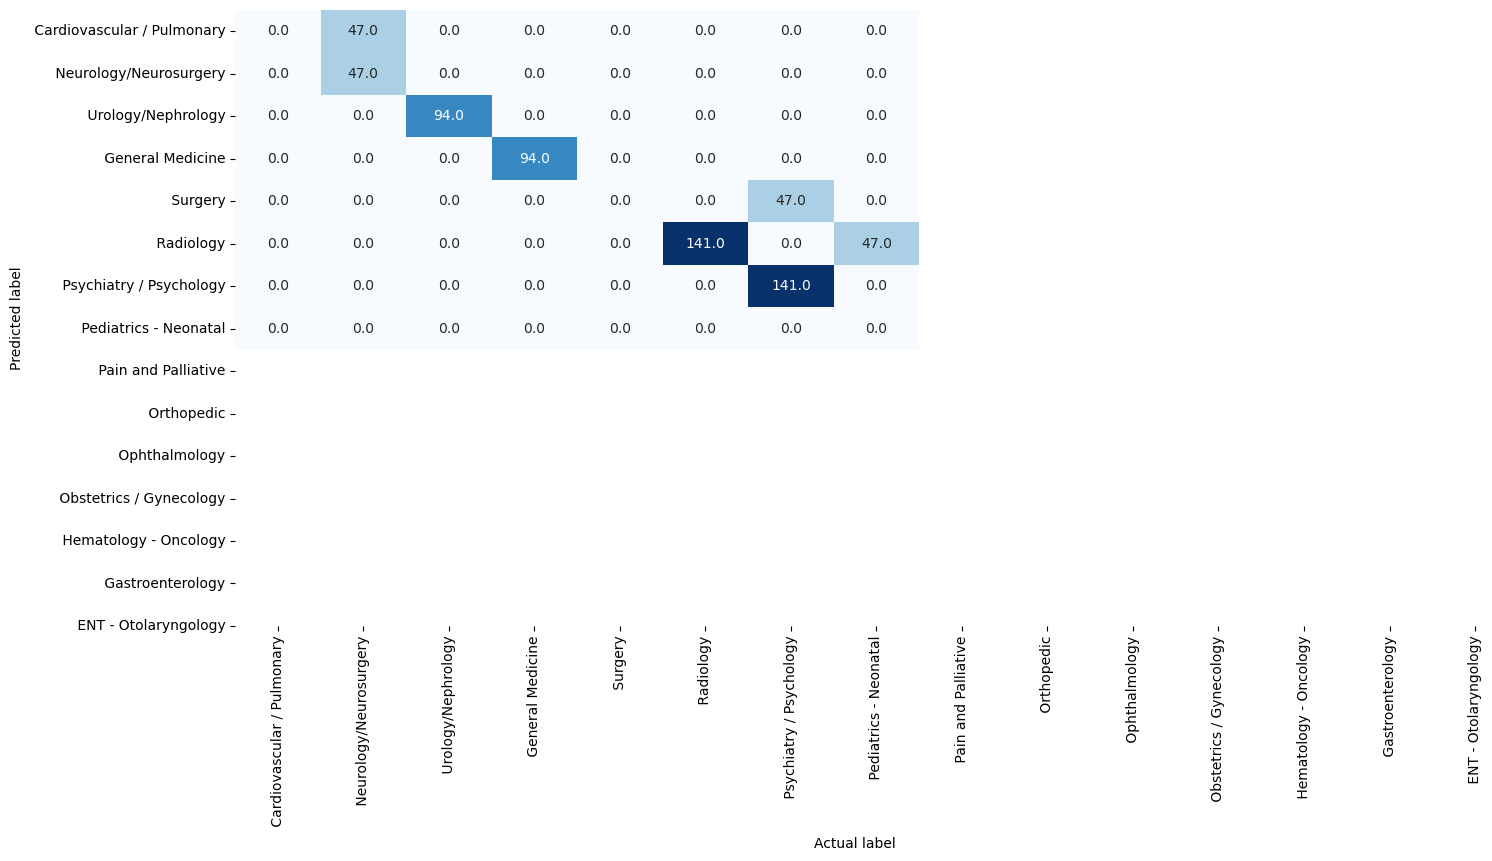

In [103]:
BERT_CLASSIFER=fine_tunning('bert-base-uncased',BertForSequenceClassification,BertTokenizer)

In [109]:
accuracy_score_bert=BERT_CLASSIFER[1]
F1_Score_bert=BERT_CLASSIFER[2]
Precision_bert=BERT_CLASSIFER[3]
Recall_bert=BERT_CLASSIFER[4]

## FINE TUNING ON ROBERTA

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias']
You should pr


======== Epoch 1 / 25 ========
Training...
Training loss 1.9835843262187938, accuracy 0.3792642140468227
Validation loss 1.4538670778274536, accuracy 0.3141711229946524

======== Epoch 2 / 25 ========
Training...
Training loss 1.3571286364035173, accuracy 0.48361204013377923
Validation loss 0.8360762000083923, accuracy 0.5655080213903743

======== Epoch 3 / 25 ========
Training...
Training loss 1.1416347928863158, accuracy 0.5210702341137123
Validation loss 1.132257103919983, accuracy 0.37700534759358284

======== Epoch 4 / 25 ========
Training...
Training loss 1.0186404697397813, accuracy 0.5354515050167223
Validation loss 0.9240598678588867, accuracy 0.37700534759358284

======== Epoch 5 / 25 ========
Training...
Training loss 0.9400679319300116, accuracy 0.5494983277591973
Validation loss 0.9880403280258179, accuracy 0.5026737967914439

======== Epoch 6 / 25 ========
Training...
Training loss 0.8759846032303285, accuracy 0.5625418060200669
Validation loss 1.0080002546310425, accura

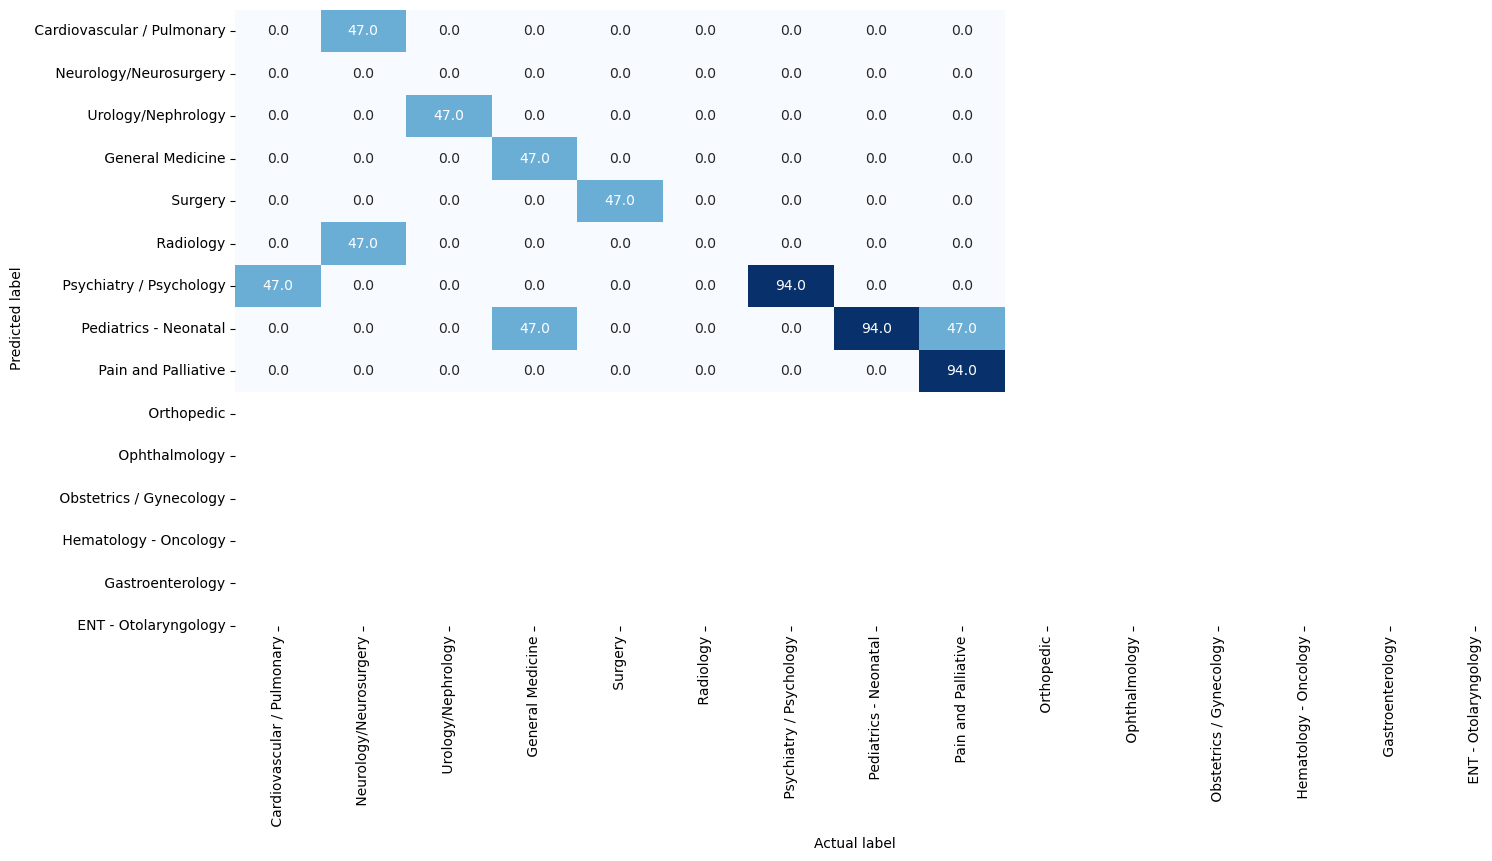

In [107]:
ROBBERTA_CLASSIFER=fine_tunning('roberta-base',RobertaForSequenceClassification,RobertaTokenizer)

In [110]:
accuracy_score_rob=ROBBERTA_CLASSIFER[1]
F1_Score_rob=ROBBERTA_CLASSIFER[2]
Precision_rob=ROBBERTA_CLASSIFER[3]
Recall_rob=ROBBERTA_CLASSIFER[4]

## FINE TUNING ON XLNET

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a


======== Epoch 1 / 25 ========
Training...
Training loss 2.3249254309557337, accuracy 0.29565217391304344
Validation loss 1.629583716392517, accuracy 0.37700534759358284

======== Epoch 2 / 25 ========
Training...
Training loss 1.569823686133094, accuracy 0.43846153846153846
Validation loss 1.3666162490844727, accuracy 0.5026737967914439

======== Epoch 3 / 25 ========
Training...
Training loss 1.2314726987624551, accuracy 0.49565217391304345
Validation loss 1.1958935260772705, accuracy 0.43983957219251335

======== Epoch 4 / 25 ========
Training...
Training loss 1.0977819278278453, accuracy 0.5193979933110368
Validation loss 0.9311824440956116, accuracy 0.5026737967914439

======== Epoch 5 / 25 ========
Training...
Training loss 0.9855149541309173, accuracy 0.5491638795986622
Validation loss 0.916995644569397, accuracy 0.5026737967914439

======== Epoch 6 / 25 ========
Training...
Training loss 0.9173662127020524, accuracy 0.5521739130434782
Validation loss 0.7462586760520935, accura

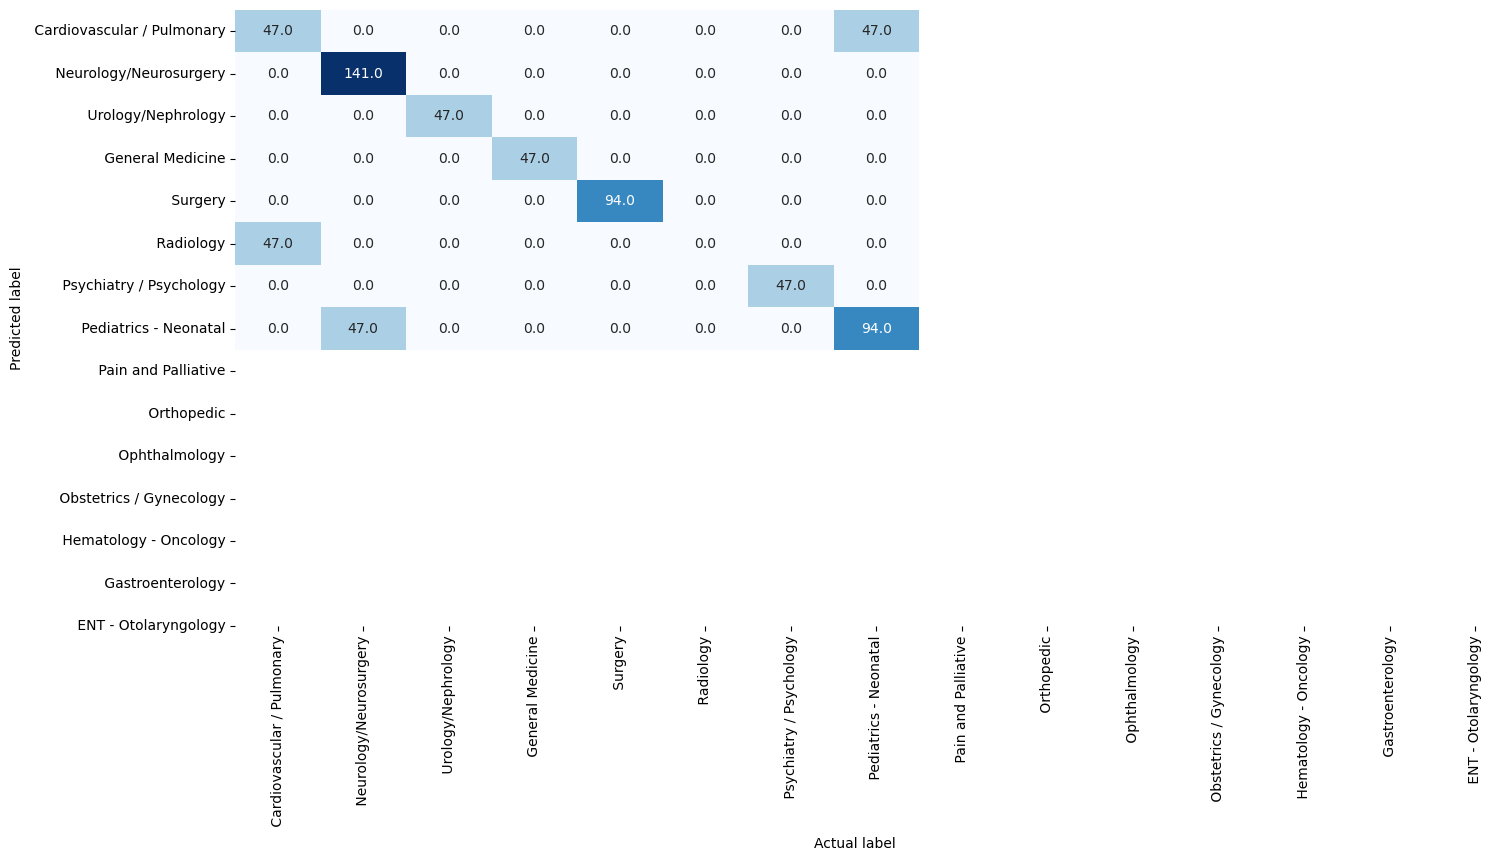

In [125]:
XLNET_CLASSIFER=fine_tunning('xlnet-base-cased',XLNetForSequenceClassification,XLNetTokenizer)

In [130]:
accuracy_score_xlnet=XLNET_CLASSIFER[1]
F1_Score_xlnet=XLNET_CLASSIFER[2]
Precision_xlnet=XLNET_CLASSIFER[3]
Recall_xlnet=XLNET_CLASSIFER[4]

## FINE TUNING ON BIOBERT

In [111]:
BIOBERT_CLASSIFER= fine_tunning('dmis-lab/biobert-base-cased-v1.1',AutoModelForSequenceClassification,AutoTokenizer)

Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.1 were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification we


======== Epoch 1 / 25 ========
Training...
Training loss 2.072399108805121, accuracy 0.35618729096989965
Validation loss 1.2160918712615967, accuracy 0.5026737967914439

======== Epoch 2 / 25 ========
Training...
Training loss 1.3962355068023191, accuracy 0.46822742474916385
Validation loss 0.9686805009841919, accuracy 0.5026737967914439

======== Epoch 3 / 25 ========
Training...
Training loss 1.1130491205077757, accuracy 0.5354515050167223
Validation loss 1.0208626985549927, accuracy 0.3141711229946524

======== Epoch 4 / 25 ========
Training...
Training loss 0.9555670003839992, accuracy 0.5698996655518395
Validation loss 0.7804943323135376, accuracy 0.43983957219251335

======== Epoch 5 / 25 ========
Training...
Training loss 0.8640419181017952, accuracy 0.5846153846153845
Validation loss 0.9536363482475281, accuracy 0.43983957219251335

======== Epoch 6 / 25 ========
Training...
Training loss 0.8344723269901174, accuracy 0.5896321070234113
Validation loss 0.8937152028083801, accur

In [112]:
accuracy_score_bio=BIOBERT_CLASSIFER[1]
F1_Score_bio=BIOBERT_CLASSIFER[2]
Precision_bio=BIOBERT_CLASSIFER[3]
Recall_bio=BIOBERT_CLASSIFER[4]

In [133]:
# Create a dataframe to store accuracy and  F1 Scores of all models we will build
DICTF={'Model':['Logistic Regression','Logistic Regression with pca','Decision Tree','Decision Tree with pca','Random Forest','Random Forest with pca','naive bayes','Fine Tuning BERT','Fine Tuning Roberta','Fine Tuning XLNET','Fine Tuning BIOBERT'],
       'Accuracy':[ACC_lr1,ACC_lr2,ACC_dt1,ACC_dt2,ACC_rf1,ACC_rf2,ACC_nv,accuracy_score_bert,accuracy_score_rob,accuracy_score_xlnet,accuracy_score_bio],
       'F1 Score':[f1_lr1,f1_lr2,f1_dt1,f1_dt2,f1_rf1,f1_rf2,f1_nv,F1_Score_bert,F1_Score_rob,F1_Score_xlnet,F1_Score_bio],
       'Precision':[Precision_lr1,Precision_lr2,Precision_dt1,Precision_dt2,Precision_rf1,Precision_rf2,Precision_nv,Precision_bert,Precision_rob,Precision_xlnet,Precision_bio],
       'Recall':[Recall_lr1,Recall_lr2,Recall_dt1,Recall_dt2,Recall_rf1,Recall_rf2,Recall_nv,Recall_bert,Recall_rob,Recall_xlnet,Recall_bio]}

pd.DataFrame.from_dict(DICTF)


Model  Accuracy  F1 Score  Precision  Recall
0            Logistic Regression      0.55      0.53       0.54    0.55
1   Logistic Regression with pca      0.56      0.54       0.53    0.56
2                  Decision Tree      0.45      0.39       0.42    0.45
3         Decision Tree with pca      0.43      0.37       0.34    0.43
4                  Random Forest      0.49      0.41       0.44    0.49
5         Random Forest with pca      0.45      0.33       0.30    0.45
6                    naive bayes      0.49      0.38       0.43    0.49
7               Fine Tuning BERT      0.79      0.76       0.77    0.79
8            Fine Tuning Roberta      0.64      0.67       0.77    0.64
9              Fine Tuning XLNET      0.79      0.76       0.73    0.79
10           Fine Tuning BIOBERT      0.50      0.51       0.55    0.50

## INFERENCE

In [124]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load BioBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('dmis-lab/biobert-v1.1')
model = AutoModelForSequenceClassification.from_pretrained('dmis-lab/biobert-v1.1')

# Example input text for inference
input_text =df2['transcription'][1]

clean_text(input_text)

# Tokenize and encode the input text
encoded_input = tokenizer(input_text, truncation=True, padding=True, return_tensors='pt')

# Forward pass through the model
with torch.no_grad():
    outputs = model(**encoded_input)

# Get the predicted label and associated score
predicted_label = torch.argmax(outputs.logits, dim=1).item()
predicted_score = torch.softmax(outputs.logits, dim=1)[0][predicted_label].item()

# Convert the label to its corresponding class
label_mapping = {v: k for k, v in REVERSE.items()} # Replace with your label mapping

predicted_class = label_mapping[predicted_label]

# Print the predicted class and score
print(f"Predicted Class: {predicted_class}")
print(f"Predicted Score: {predicted_score:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted Class:  Cardiovascular / Pulmonary
Predicted Score: 0.5687


CONCLUSIONS AND RECOMMENDATIONS:

1. Transformers especially fine tuning on BERT produced the best results with accuracy 0.79.

2. Biobert although trained on biomedical data did not produce good results. The cause may be that Biobert was trained mostly on pubmed data which usually consists of trial and research paper data with more emphasis on methodology, statistics and results of the study which completly different from the medical transcription notes data.

3. Models to evaluate next:
      
       LSTM
       T5 Multi Lable classification
       Clinical BERT (trained on transcription notes)
       DISTILBERT
       
       